In [1]:
import pandas as pd
import librosa as lb
import numpy as np
import scipy as sp
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = '/Users/William/Desktop/heart-sounds/dataset/SetA'
all_files=[]
for filename in os.listdir(data_dir):
    if 'test' not in filename and not filename.startswith('.') and not filename.startswith('set_a'):
        all_files.append(filename)
        continue
    else:
        continue

In [3]:
np.random.seed(42)
training_set = np.random.choice(all_files,size=int(len(all_files)*0.8),replace=False)

In [4]:
test_set = [x for x in all_files if x not in training_set]

In [5]:
np.savetxt('SetA_training_fnames.csv', training_set, delimiter=',',fmt='%s')

In [6]:
cols=['type',
      'avg_rmse','std_rmse','kur_rmse','skew_rmse',
      'avg_zcr','std_zcr','kur_zcr','skew_zcr',
      'avg_mfcc_0','std_mfcc_0','kur_mfcc_0','skew_mfcc_0',
      'avg_mfcc_1','std_mfcc_1','kur_mfcc_1','skew_mfcc_1',
      'avg_mfcc_2','std_mfcc_2','kur_mfcc_2','skew_mfcc_2',
      'avg_mfcc_3','std_mfcc_3','kur_mfcc_3','skew_mfcc_3',
      'avg_mfcc_4','std_mfcc_4','kur_mfcc_4','skew_mfcc_4',
      'avg_mfcc_5','std_mfcc_5','kur_mfcc_5','skew_mfcc_5',
      'avg_mfcc_6','std_mfcc_6','kur_mfcc_6','skew_mfcc_6',
      'avg_mfcc_7','std_mfcc_7','kur_mfcc_7','skew_mfcc_7',
      'avg_mfcc_8','std_mfcc_8','kur_mfcc_8','skew_mfcc_8',
      'avg_mfcc_9','std_mfcc_9','kur_mfcc_9','skew_mfcc_9',
      'avg_mfcc_10','std_mfcc_10','kur_mfcc_10','skew_mfcc_10',
      'avg_mfcc_11','std_mfcc_11','kur_mfcc_11','skew_mfcc_11',
      'avg_mfcc_12','std_mfcc_12','kur_mfcc_12','skew_mfcc_12',
      'avg_mfcc_13','std_mfcc_13','kur_mfcc_13','skew_mfcc_13',
      'avg_mfcc_14','std_mfcc_14','kur_mfcc_14','skew_mfcc_14',
      'avg_mfcc_15','std_mfcc_15','kur_mfcc_15','skew_mfcc_15',
      'avg_mfcc_16','std_mfcc_16','kur_mfcc_16','skew_mfcc_16',
      'avg_mfcc_17','std_mfcc_17','kur_mfcc_17','skew_mfcc_17',
      'avg_mfcc_18','std_mfcc_18','kur_mfcc_18','skew_mfcc_18',
      'avg_mfcc_19','std_mfcc_19','kur_mfcc_19','skew_mfcc_19',
      'avg_mfcc_20','std_mfcc_20','kur_mfcc_10','skew_mfcc_20',
      'avg_mfcc_21','std_mfcc_21','kur_mfcc_11','skew_mfcc_21',
      'avg_mfcc_22','std_mfcc_22','kur_mfcc_12','skew_mfcc_22',
      'avg_mfcc_23','std_mfcc_23','kur_mfcc_13','skew_mfcc_23',
      'avg_mfcc_24','std_mfcc_24','kur_mfcc_14','skew_mfcc_24',
      'avg_mfcc_25','std_mfcc_25','kur_mfcc_15','skew_mfcc_25',
      'avg_mfcc_26','std_mfcc_26','kur_mfcc_16','skew_mfcc_26',
      'avg_mfcc_27','std_mfcc_27','kur_mfcc_17','skew_mfcc_27',
      'avg_mfcc_28','std_mfcc_28','kur_mfcc_18','skew_mfcc_28',
      'avg_mfcc_29','std_mfcc_29','kur_mfcc_19','skew_mfcc_29'
     ]
summary_df = pd.DataFrame(columns=cols)
rowind = 0
for fname in training_set:
    
    category = fname.split('__')[0]
    
    summary_stats=[category]
    
    sound_clip = pd.read_csv(data_dir+'/'+fname, dtype = 'float')
    col_name = sound_clip.columns.values[0]
    sr_clip = int(col_name)
    
    rmse_array = lb.feature.rmse(sound_clip[col_name].values,
                                 frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]
    
    energy_norm = np.mean(rmse_array)
    
    sound_clip[col_name] = sound_clip[col_name]/energy_norm
    
    rmse_array = lb.feature.rmse(sound_clip[col_name].values,
                                 frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]
    
    summary_stats.append(np.mean(rmse_array))
    summary_stats.append(np.std(rmse_array))
    summary_stats.append(sp.stats.kurtosis(rmse_array))
    summary_stats.append(sp.stats.skew(rmse_array))
    
    zcr_array = lb.feature.zero_crossing_rate(sound_clip[col_name].values,
                                 frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]
    
    summary_stats.append(np.mean(zcr_array))
    summary_stats.append(np.std(zcr_array))
    summary_stats.append(sp.stats.kurtosis(zcr_array))
    summary_stats.append(sp.stats.skew(zcr_array))
    
    mfcc_array = lb.feature.mfcc(sound_clip[col_name].values, sr=sr_clip,n_mfcc=30)
    
    for i in range(0,30):
        
        mfcc_data = mfcc_array[i]
        
        summary_stats.append(np.mean(mfcc_data))
        summary_stats.append(np.std(mfcc_data))
        summary_stats.append(sp.stats.kurtosis(mfcc_data))
        summary_stats.append(sp.stats.skew(mfcc_data))
    
    summary_df.loc[len(summary_df)] = summary_stats

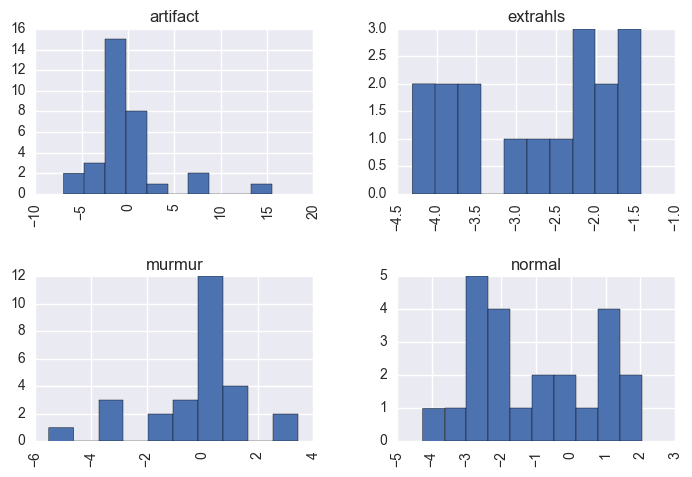

In [7]:
summary_df['avg_mfcc_29'].hist(by=summary_df['type'])
plt.show()

In [8]:
summary_df.groupby('type').describe()

avg_mfcc_0  avg_mfcc_1  avg_mfcc_10  avg_mfcc_11  avg_mfcc_12  \
type                                                                            
artifact count   32.000000   32.000000    32.000000    32.000000    32.000000   
         mean   -39.639218  105.531060    -5.712846    -7.190776    -6.828835   
         std    136.620658   55.272720    11.306197     9.894550     8.503482   
         min   -296.323931  -52.625864   -36.741221   -38.162429   -26.795220   
         25%   -123.637629   75.114587    -7.562934    -8.880872    -9.683275   
         50%    -19.562355  108.842796    -2.962759    -4.918170    -3.954473   
         75%     71.472994  142.221109     0.485112    -1.878405    -2.288874   
         max    161.318403  231.418074    13.684314    13.823725    11.789996   
extrahls count   17.000000   17.000000    17.000000    17.000000    17.000000   
         mean   -14.459414  102.069764     3.557782    -0.922329     1.302490   
         std     57.982244   37.086261     3.362023     2.582689     2.965828   
         min   -109.380254   29.489806    -3.491617    -4.928344    -4.330590   
         25%    -61.625431   80.739261     2.760854    -3.207148     0.166810   
         50%     -8.990379  105.805931     4.045687    -1.144401     1.084835   
         75%     11.534443  134.325761     5.329932     0.566157     2.433043   
         max     75.894775  151.629749     8.277593     4.153113     8.006135   
murmur   count   27.000000   27.000000    27.000000    27.000000    27.000000   
         mean  -155.601024   79.488155    10.977729     8.539659     7.336810   
         std     87.063320   31.023520     4.046776     5.302392     4.106946   
         min   -248.077140   42.946740    -2.567571    -4.637999    -4.336275   
         25%   -217.049769   59.888592     9.870869     7.406002     5.580770   
         50%   -198.193866   63.709331    11.831731     9.919037     7.883404   
         75%    -88.734345  101.605657    12.787281    10.813303     9.186373   
         max     54.118553  150.114647    16.875524    15.881534    13.456237   
normal   count   23.000000   23.000000    23.000000    23.000000    23.000000   
         mean   -35.621976   97.343354     7.657056     3.564471     4.216931   
         std     81.965019   31.105148     4.083533     5.652298     4.158664   
         min   -169.498647   27.614586    -0.164225    -5.548402    -1.512692   
         25%   -112.733327   74.802427     5.510549    -0.905750     0.949185   
         50%    -32.637431   93.199625     8.568234     2.532024     2.888823   
         75%     44.957796  121.574000    10.273980     8.775747     7.797930   
         max     81.783666  152.546049    15.124786    16.555894    14.261304   

                avg_mfcc_13  avg_mfcc_14  avg_mfcc_15  avg_mfcc_16  \
type                                                                 
artifact count    32.000000    32.000000    32.000000    32.000000   
         mean     -4.957869    -3.986712    -2.995807    -3.574843   
         std       9.266718     8.761222     6.364087     6.656175   
         min     -33.123597   -20.186197   -17.571935   -16.757761   
         25%      -7.222936    -5.310861    -4.553702    -5.552837   
         50%      -2.993730    -3.698876    -3.012832    -3.240709   
         75%      -0.426371    -1.786356    -0.284699    -1.411658   
         max      11.841976    28.533039    13.678427    22.236764   
extrahls count    17.000000    17.000000    17.000000    17.000000   
         mean     -1.572696    -0.459621    -2.325245    -1.649988   
         std       1.693622     1.612198     1.205982     1.839942   
         min      -5.568658    -3.362053    -4.218170    -4.362845   
         25%      -2.108855    -1.301493    -3.345724    -2.572132   
         50%      -1.391856    -0.685967    -2.209472    -1.875715   
         75%      -0.670061     0.372957    -1.193413    -1.601163   
         max       1.306707     2.179015    -0.190245     4.036328   
m

Note that we do see some difference in the distributions particularly for certain mfccs between the types of heart sounds. However, we have order hundreds of samples. As a result, having enough data for a classification model may be problematic. Yet each sound clip containes a number of cycles of heart beat. Therefore if we could segment the clips and treat each cycle as its own record we could boost the data set size by a factor of between 2 and 10 depending of average clip length. Let's do a quick check to see if this is worthwhile:

In [9]:
lens=[]
for fname in training_set:
    
    sound_clip = pd.read_csv(data_dir+'/'+fname, dtype = 'float')
    col_name = sound_clip.columns.values[0]
    sr_clip = int(col_name)
    # convert clip length to rough estimate of number of beats lets assume 1 beat per second
    lens.append(len(sound_clip)/sr_clip)
    
np.mean(lens)

7.8733482214434591

So we can probably get about an 8x increase in effective data set size by segmenting the data into cycles.

artifact


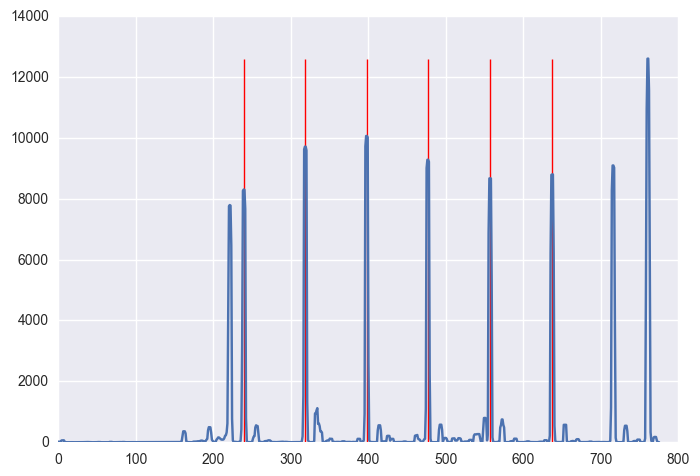

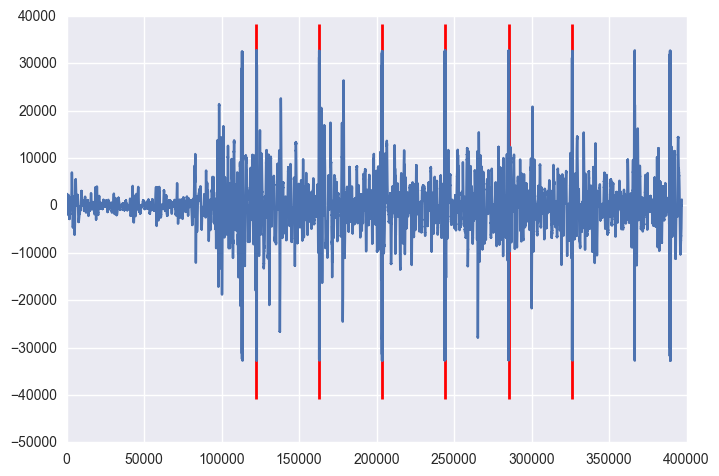

/Users/William/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


extrahls


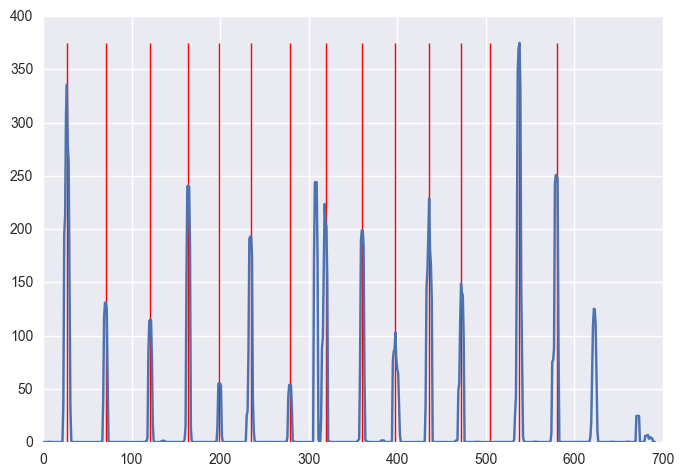

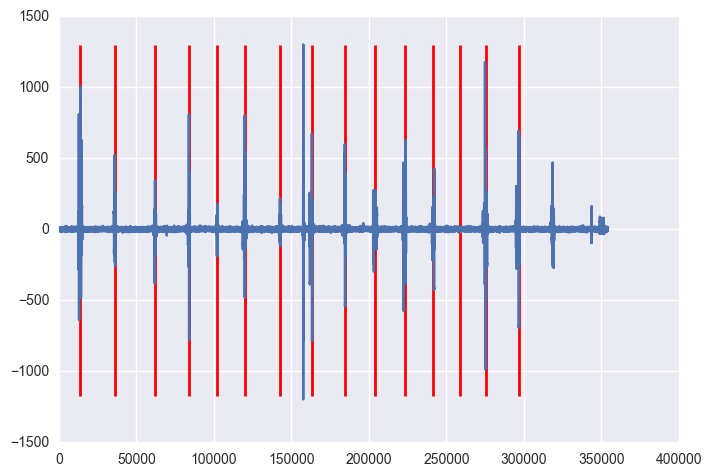

artifact


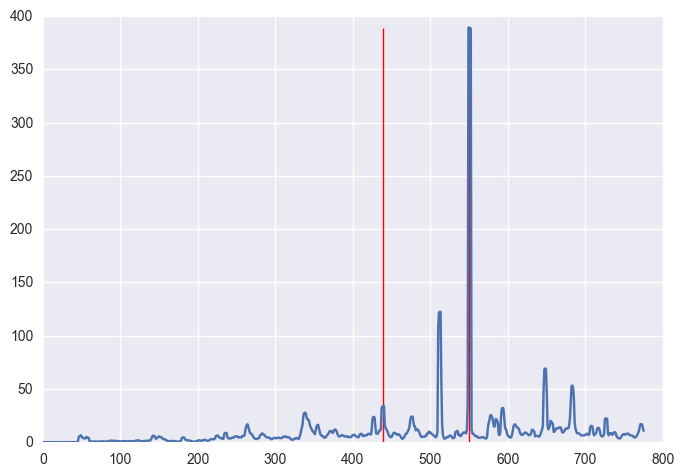

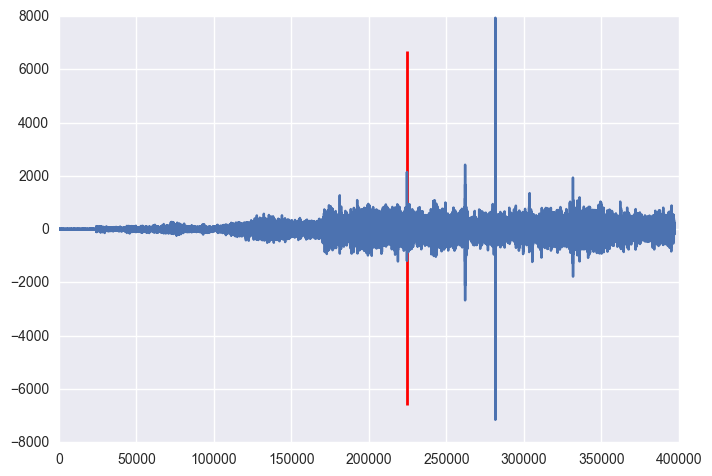

murmur


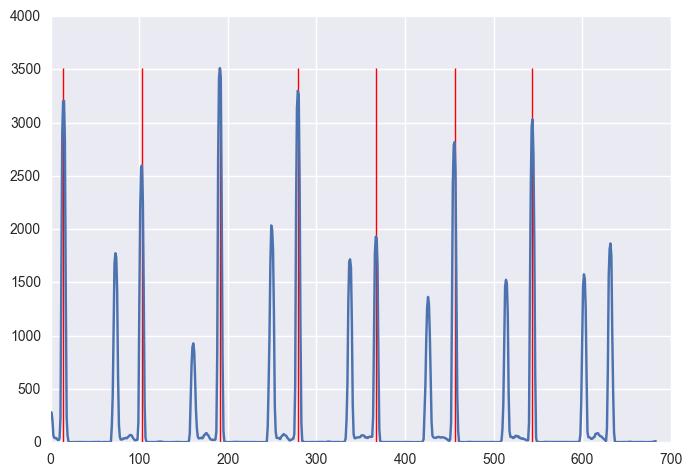

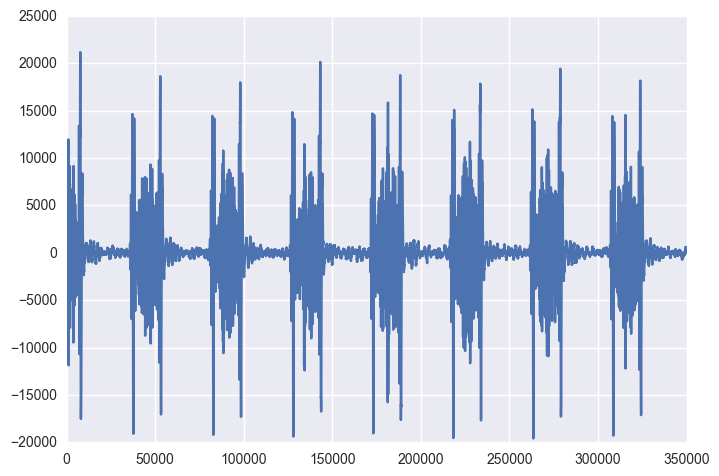

extrahls


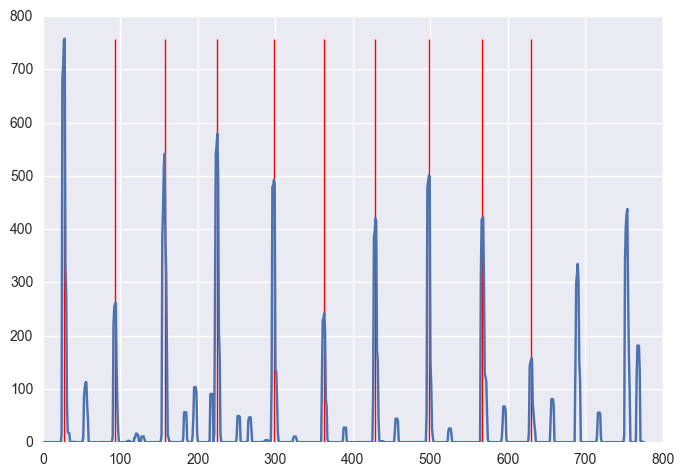

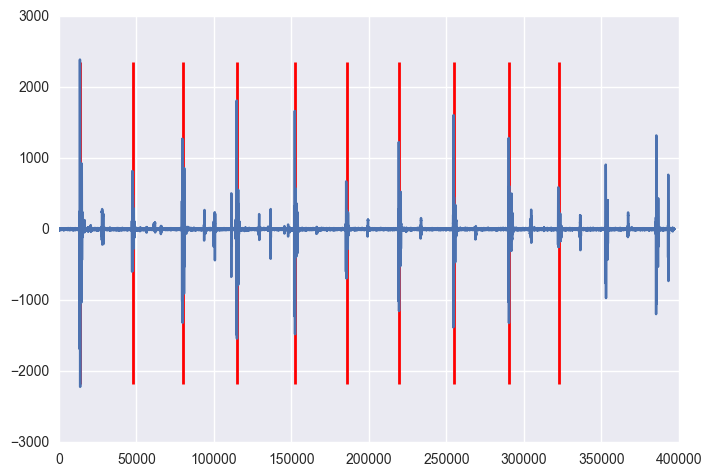

murmur


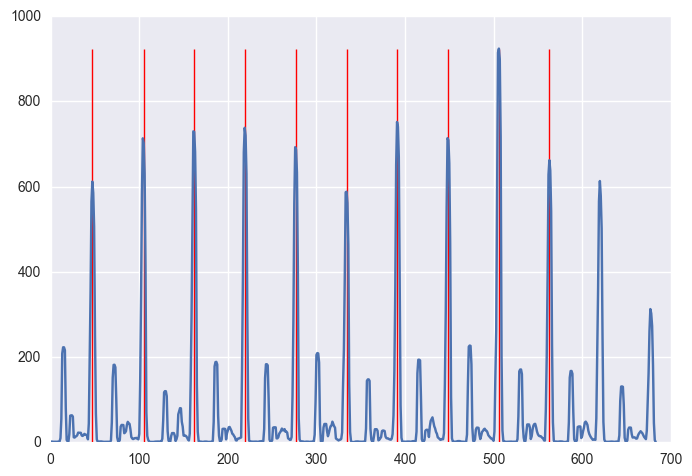

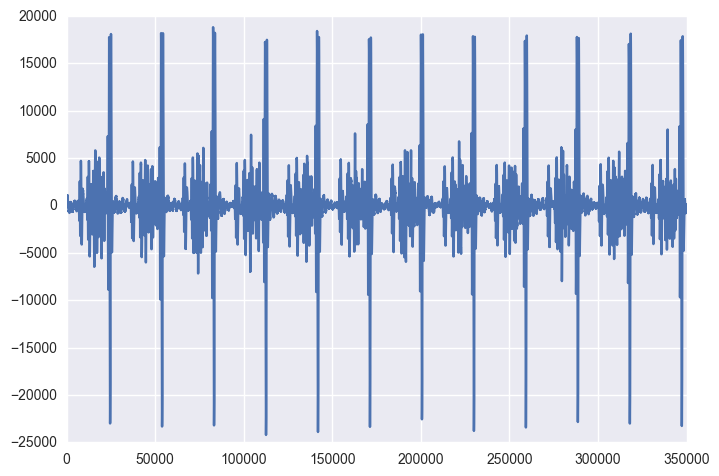

extrahls


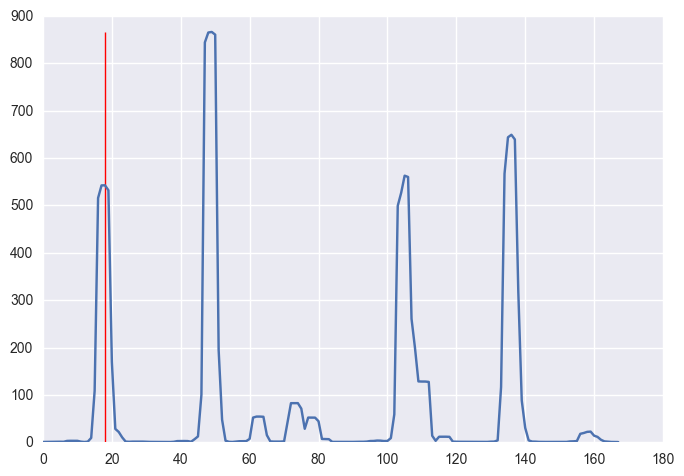

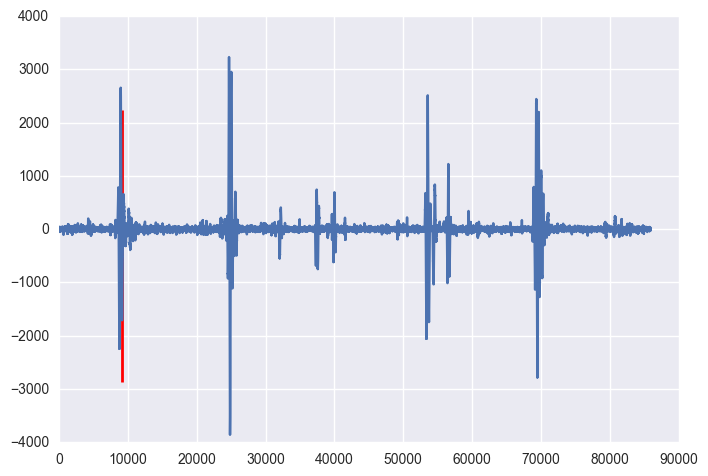

normal


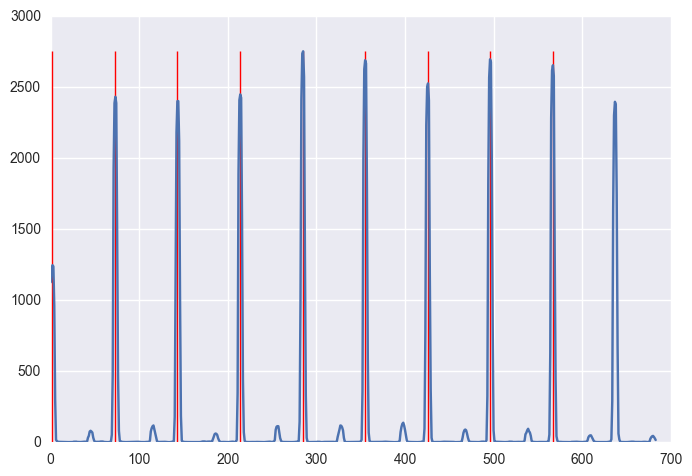

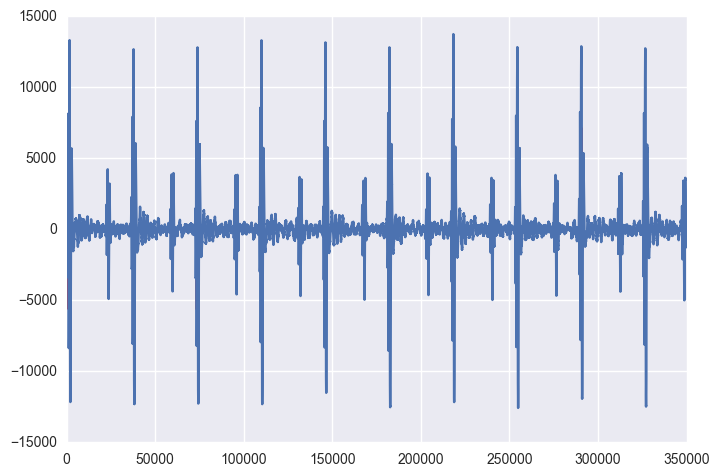

normal


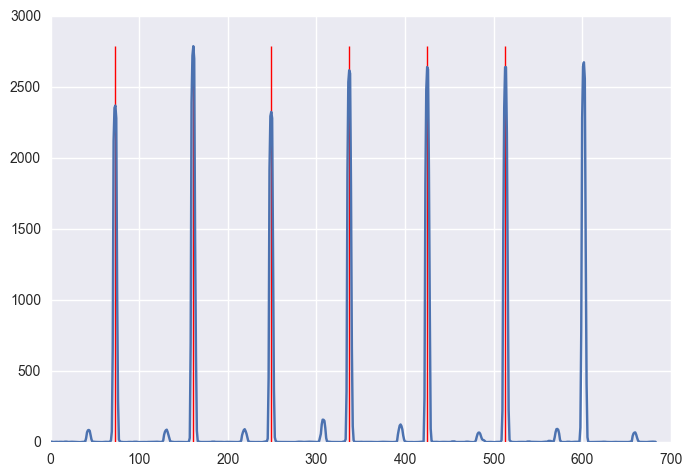

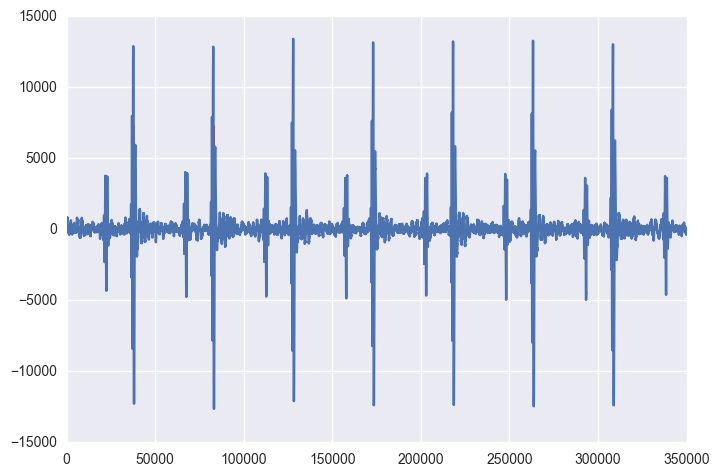

artifact


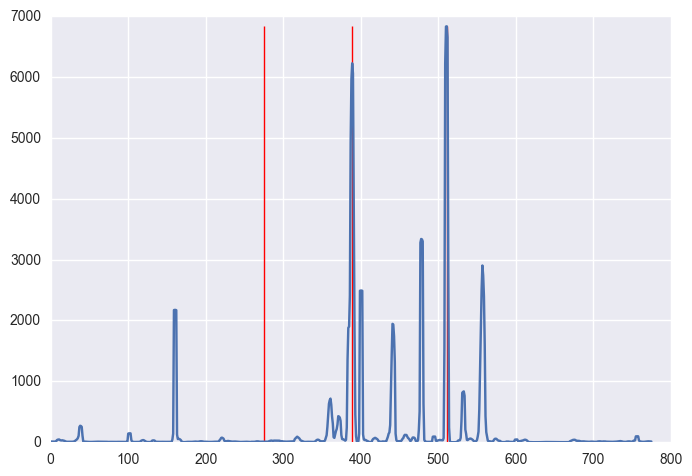

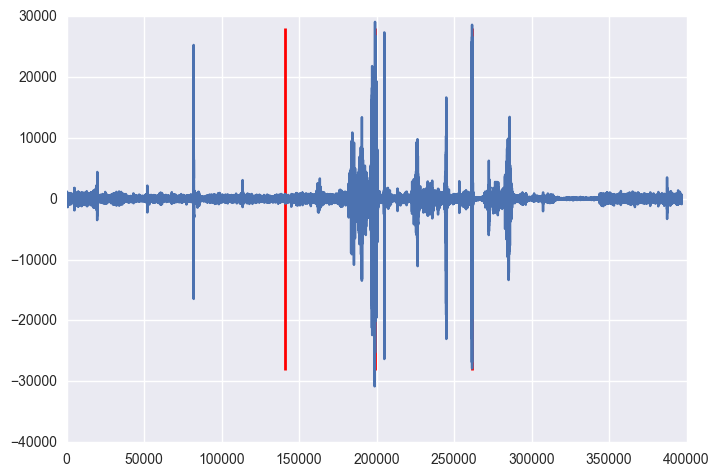

artifact


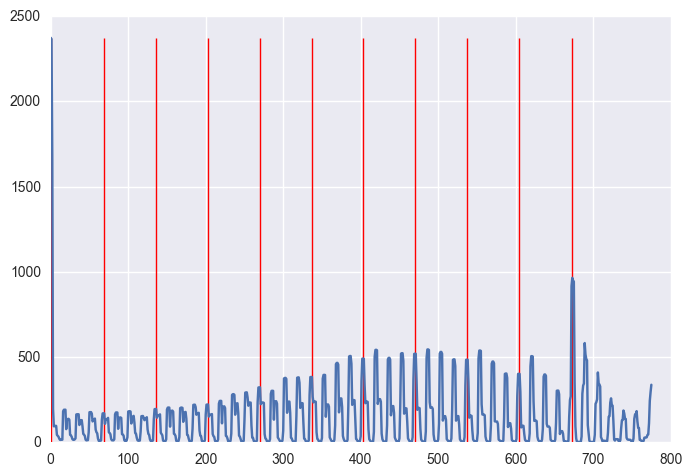

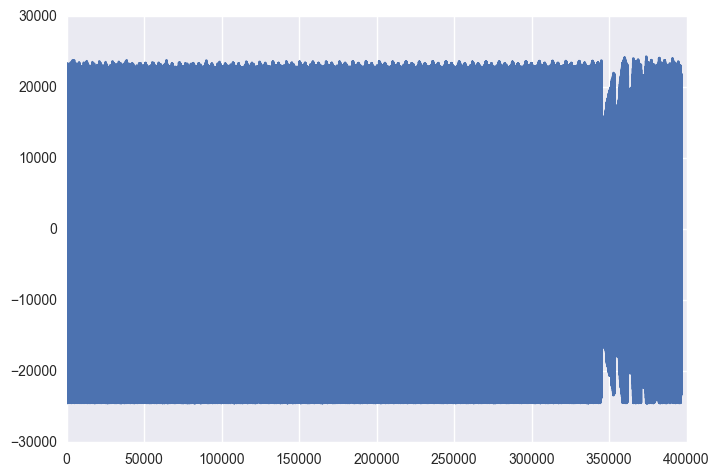

normal


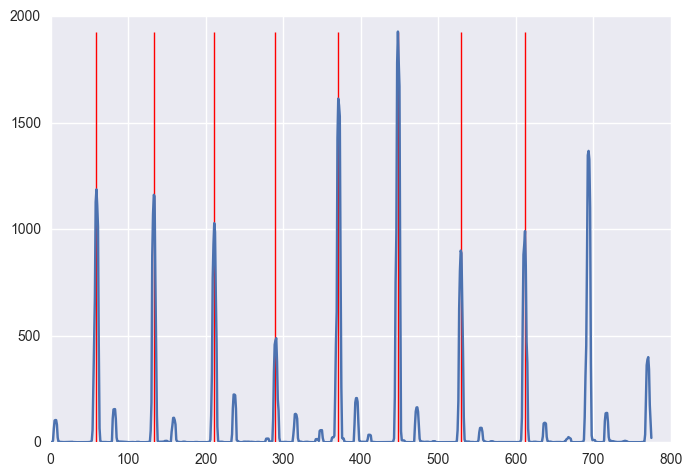

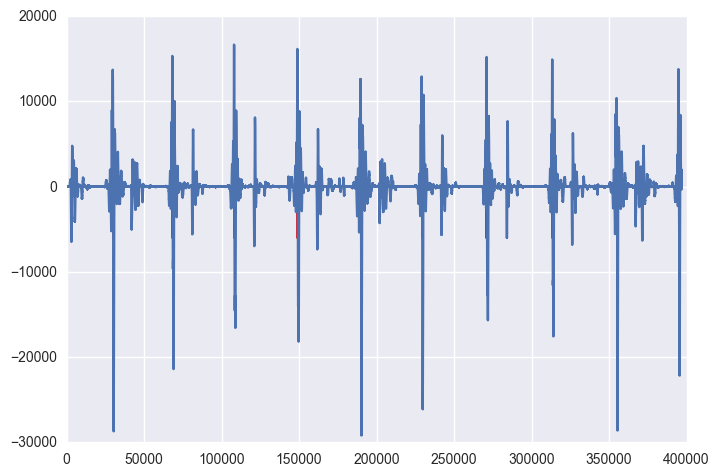

extrahls


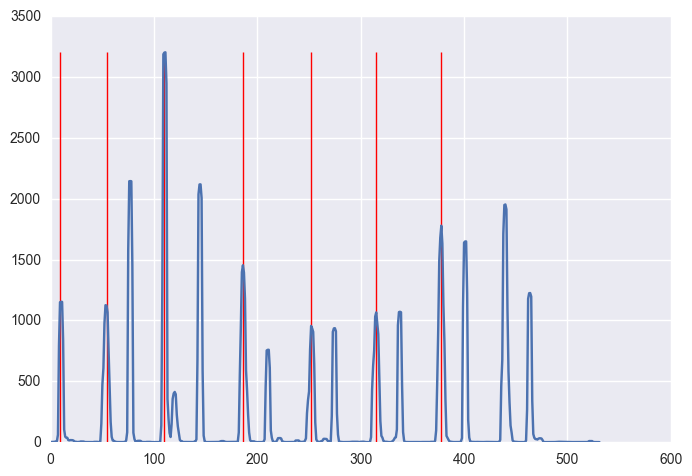

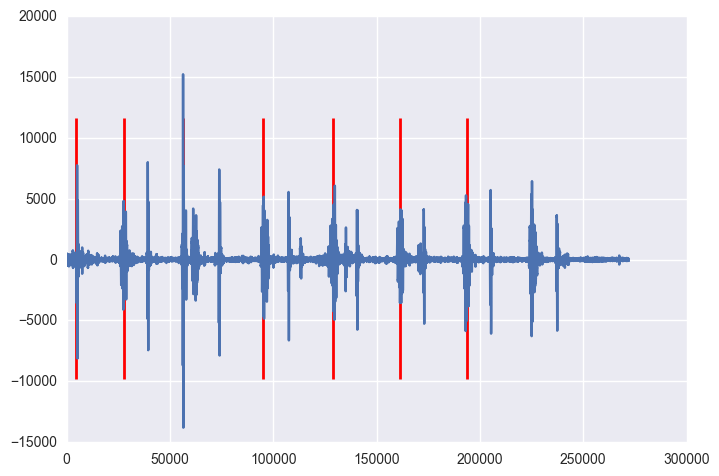

normal


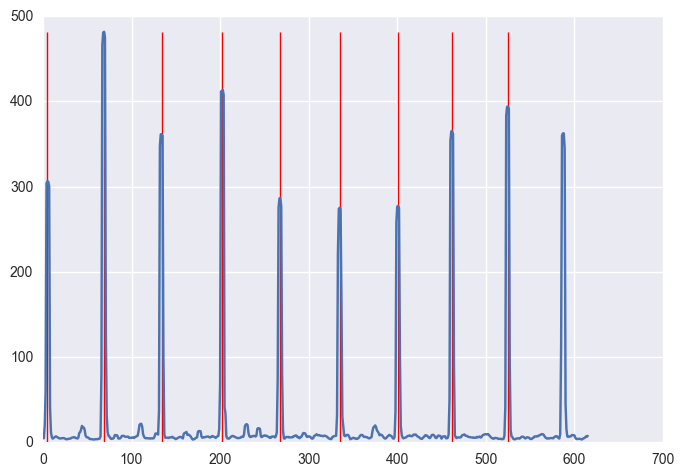

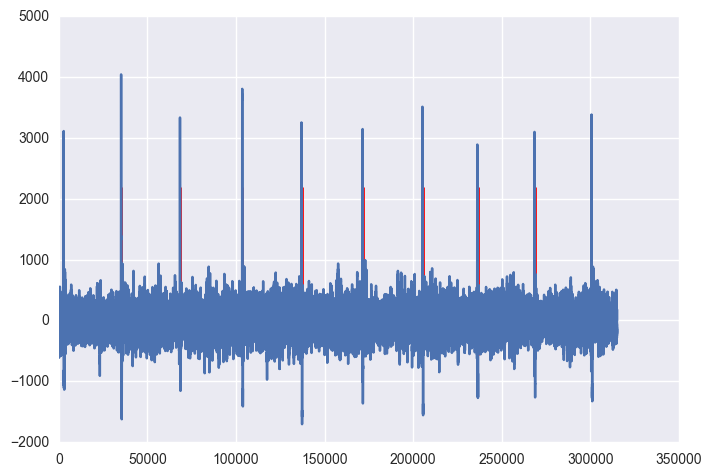

artifact


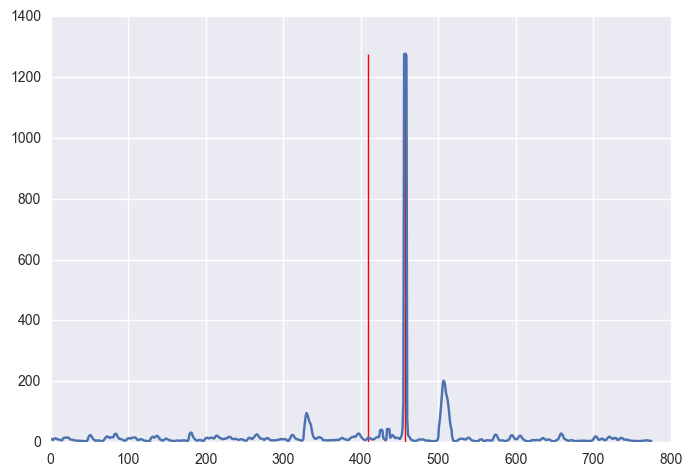

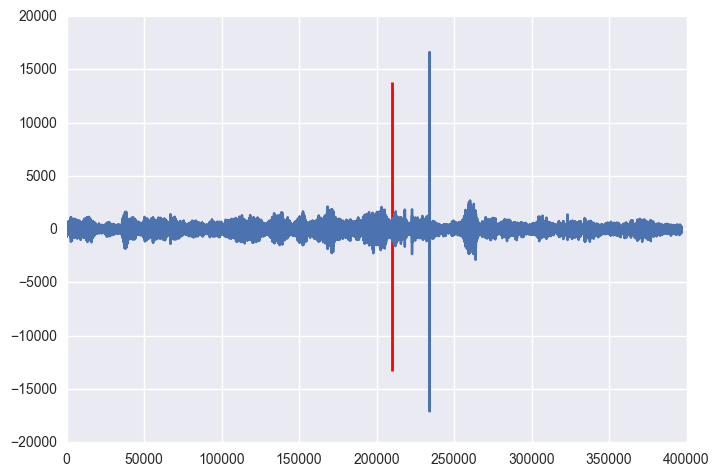

murmur


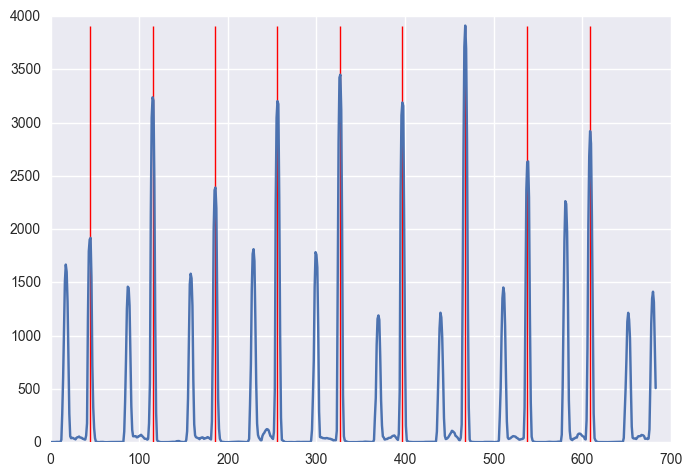

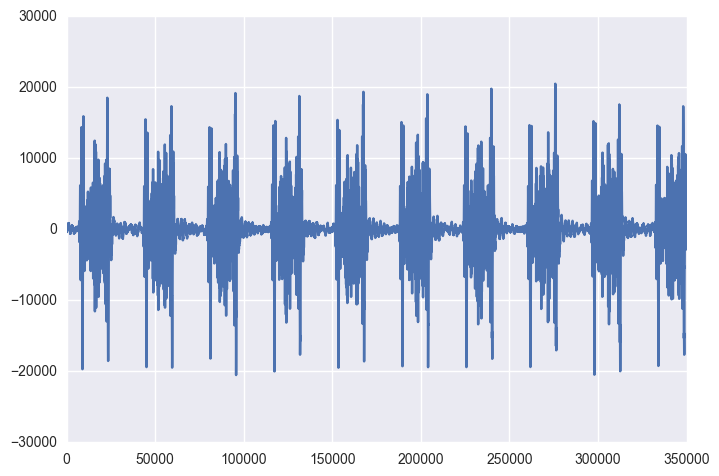

artifact


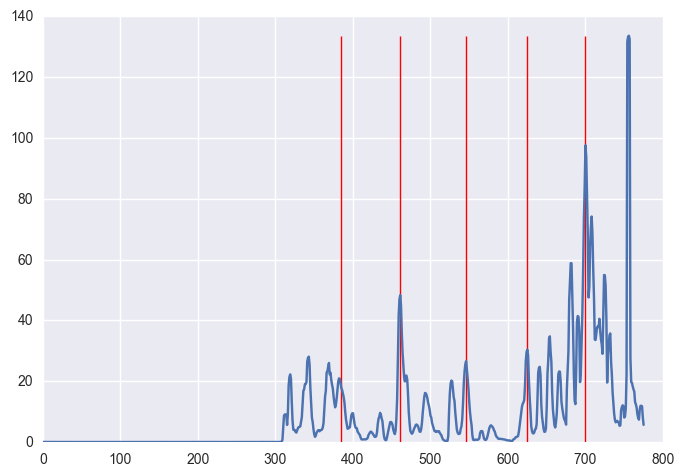

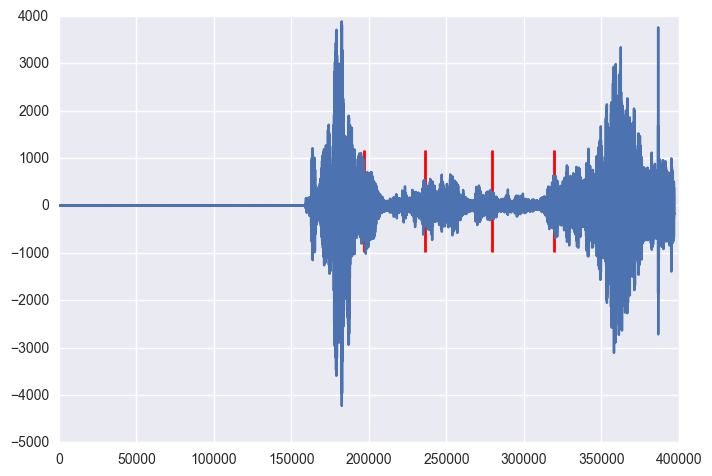

normal


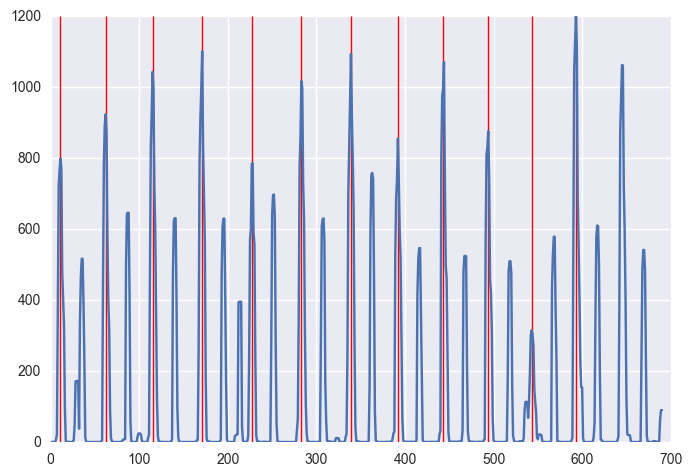

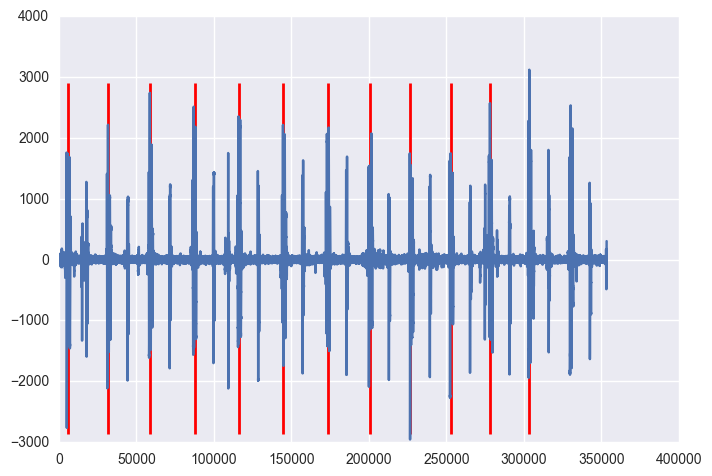

artifact


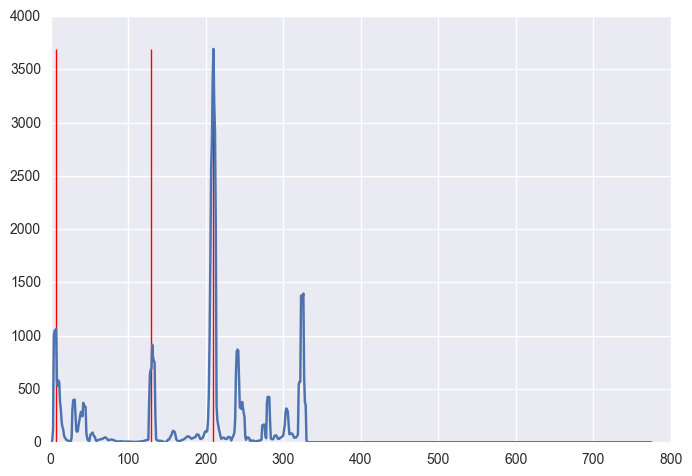

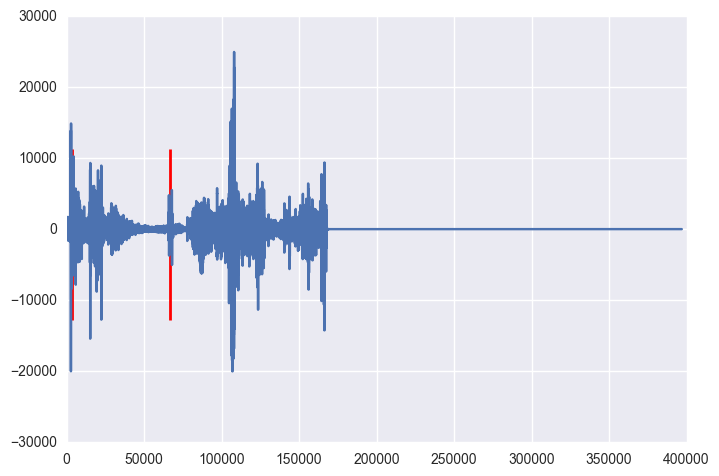

normal


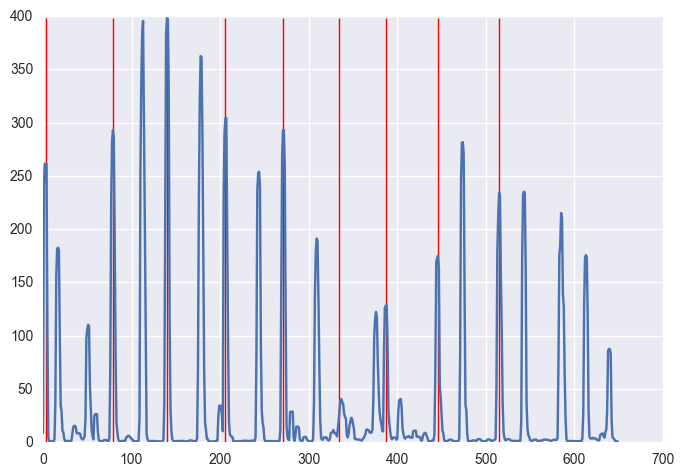

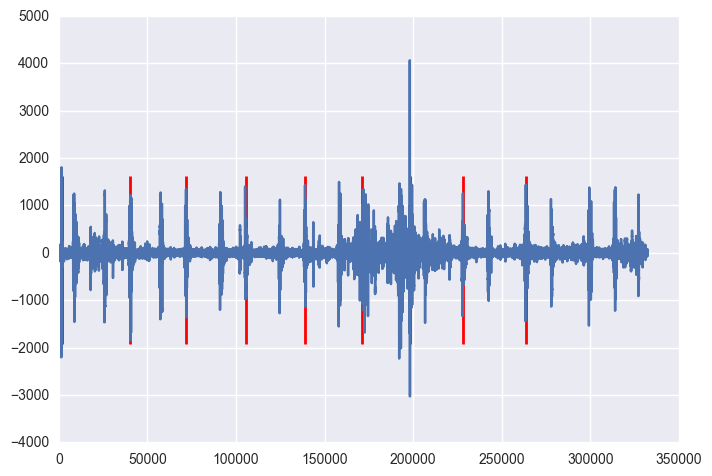

extrahls


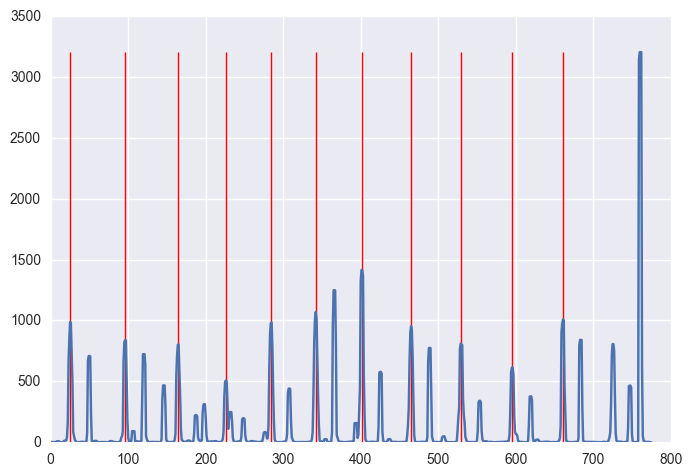

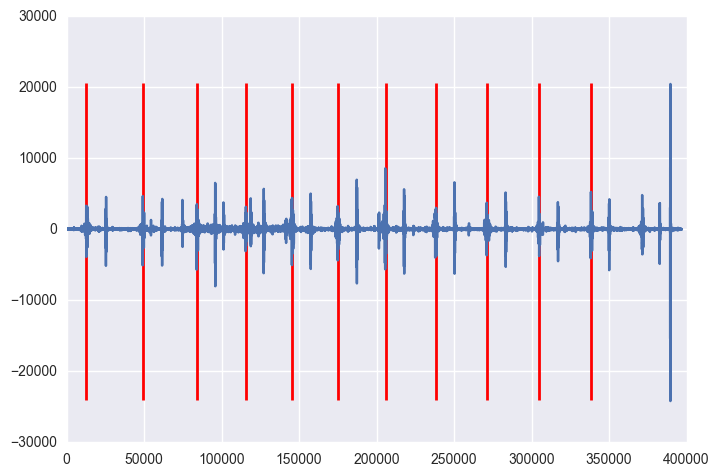

murmur


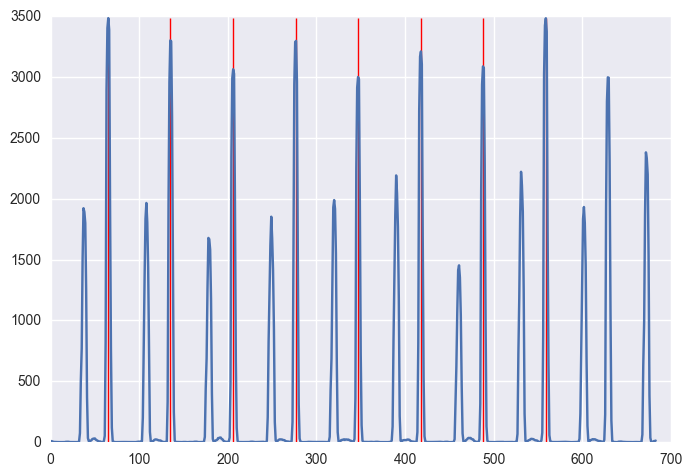

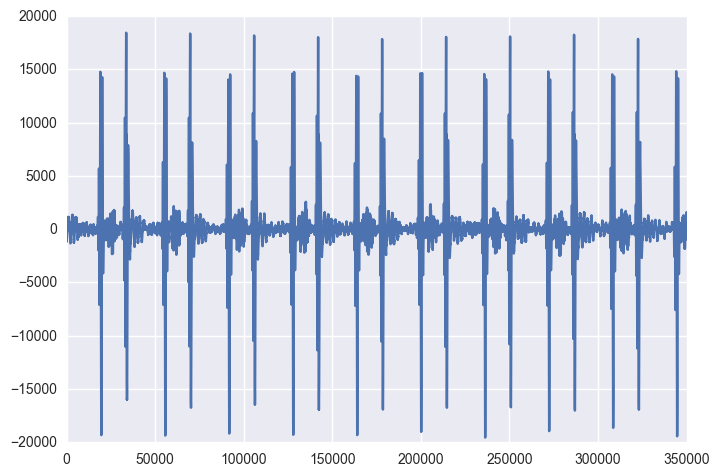

artifact


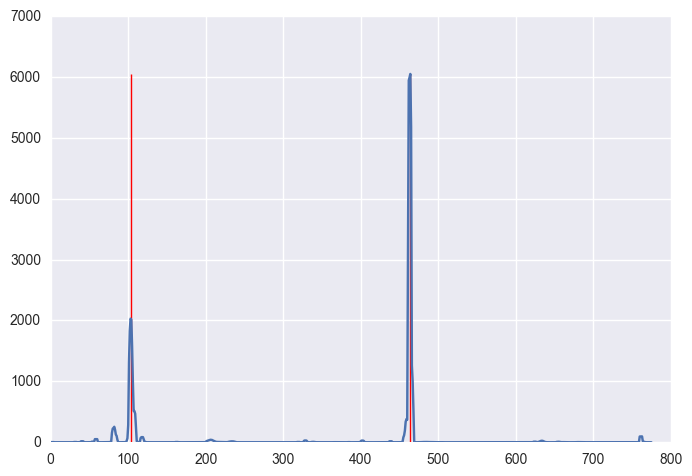

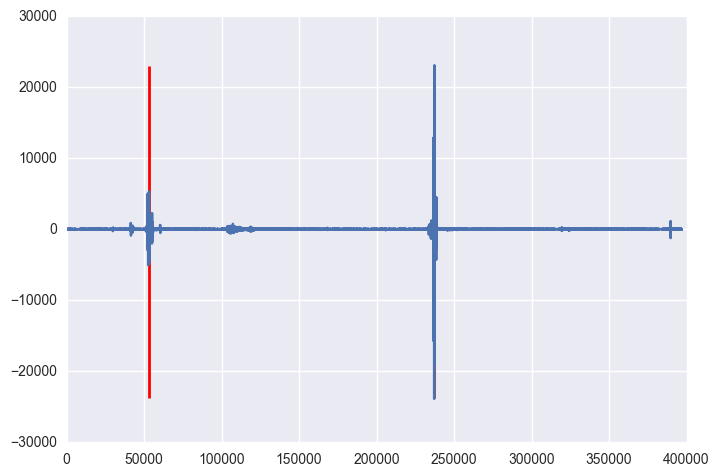

artifact


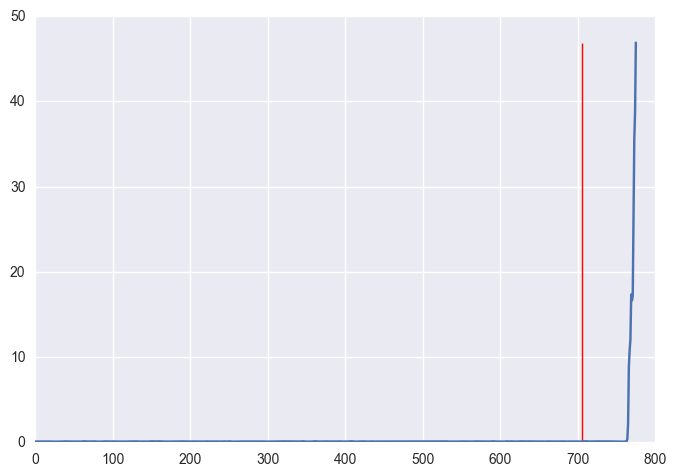

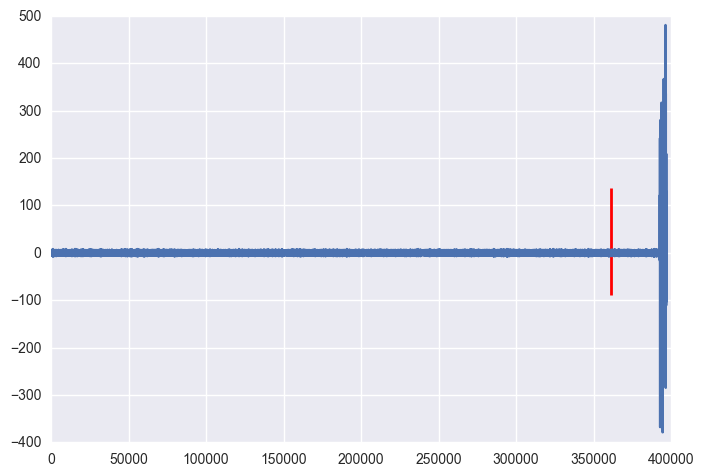

artifact


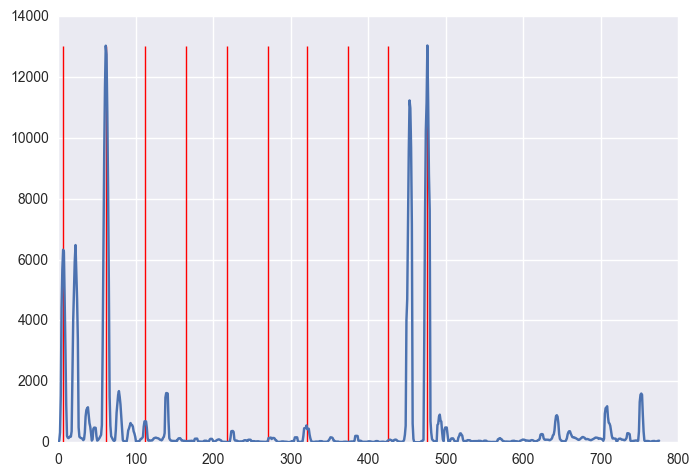

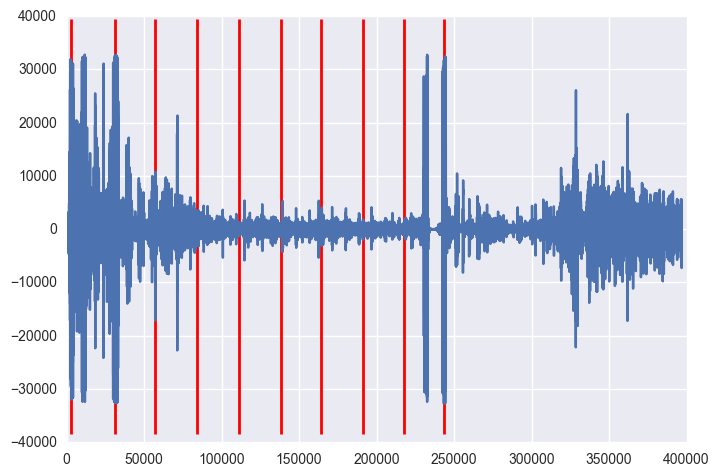

murmur


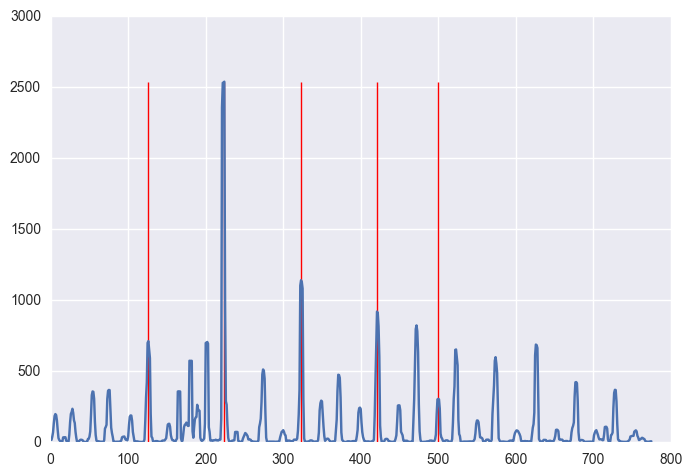

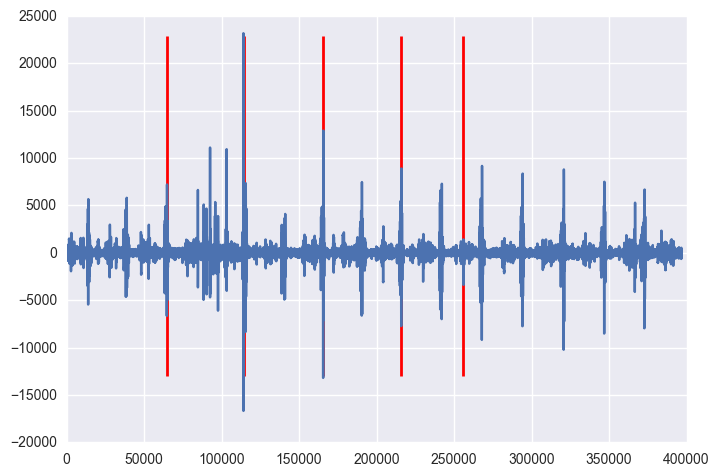

artifact


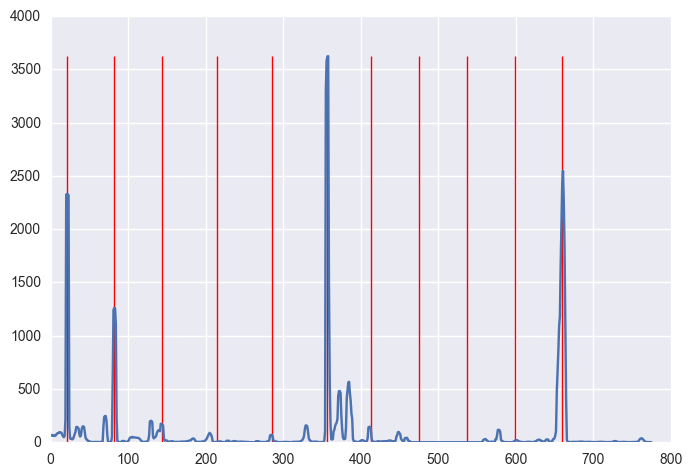

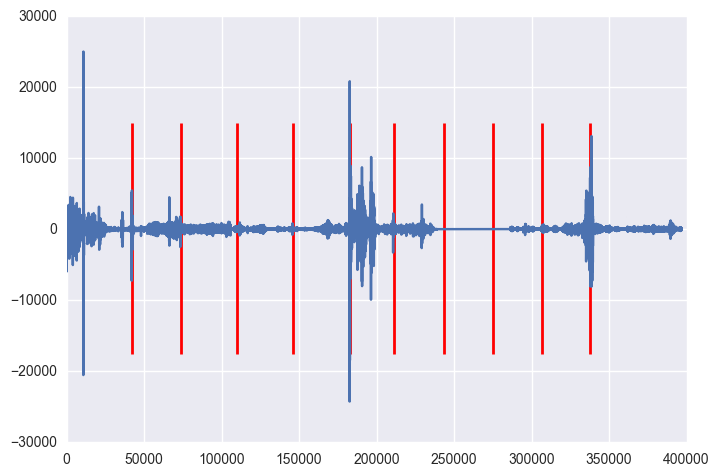

artifact


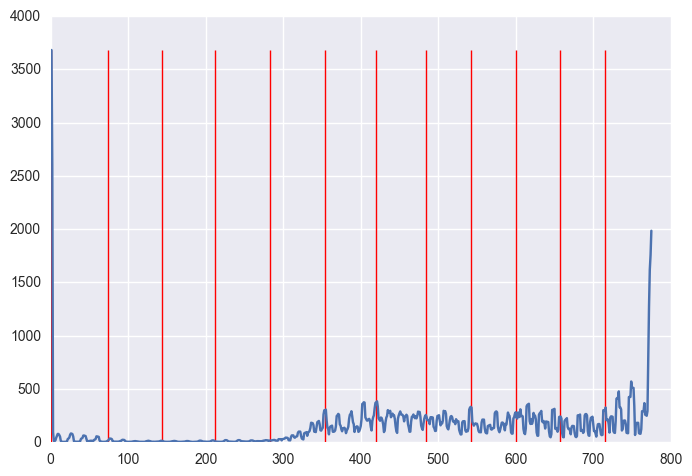

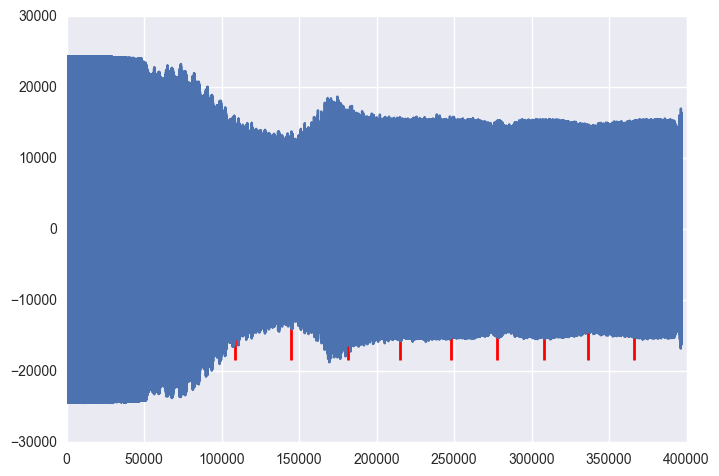

extrahls


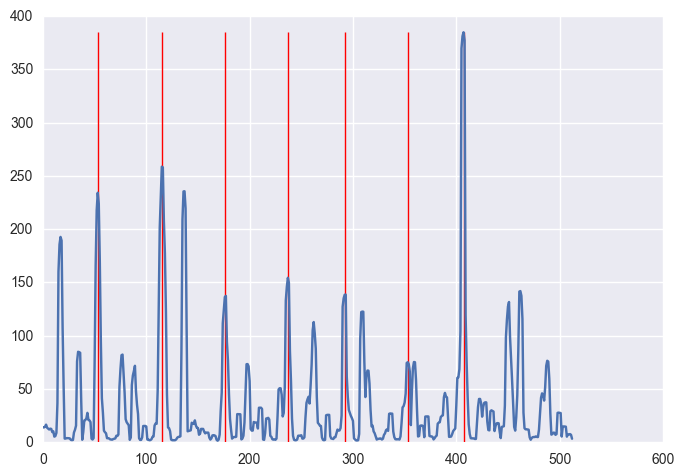

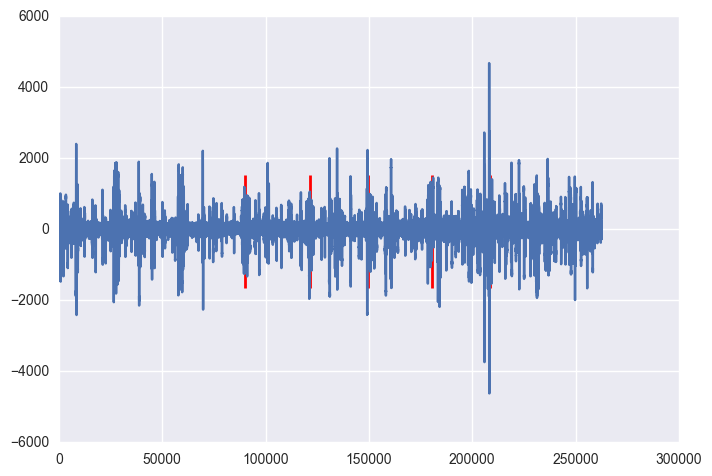

normal


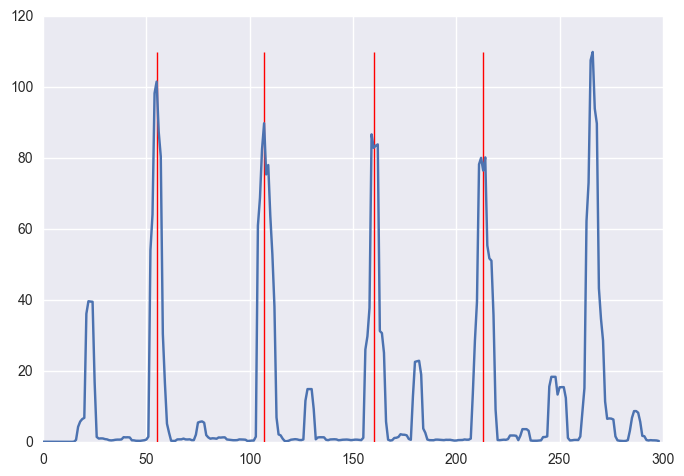

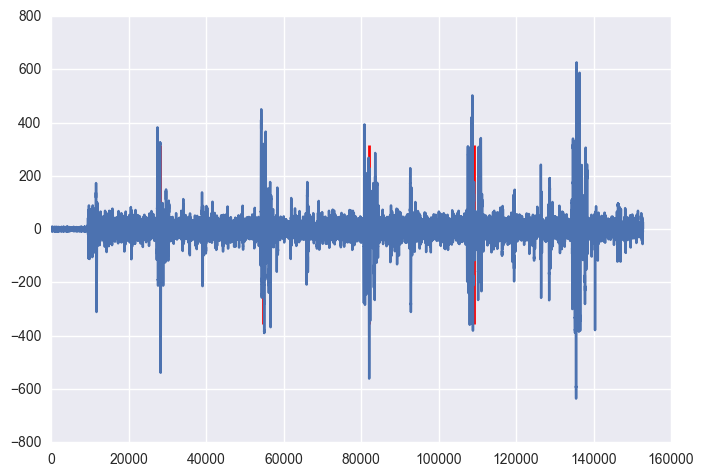

murmur


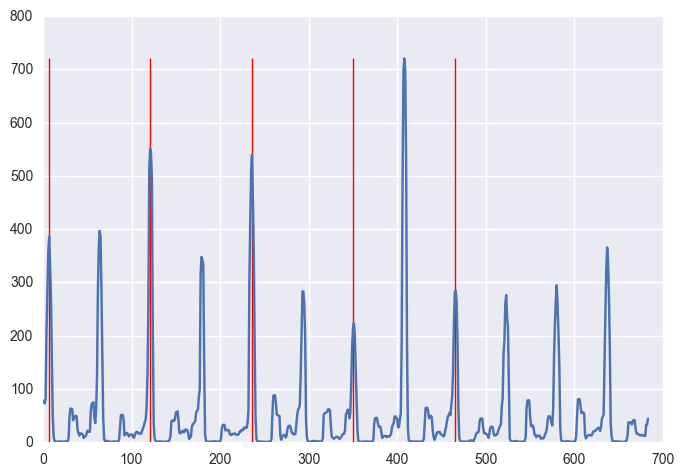

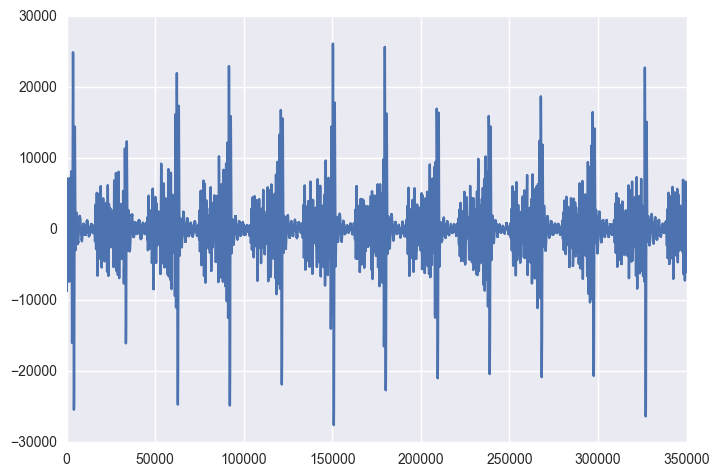

murmur


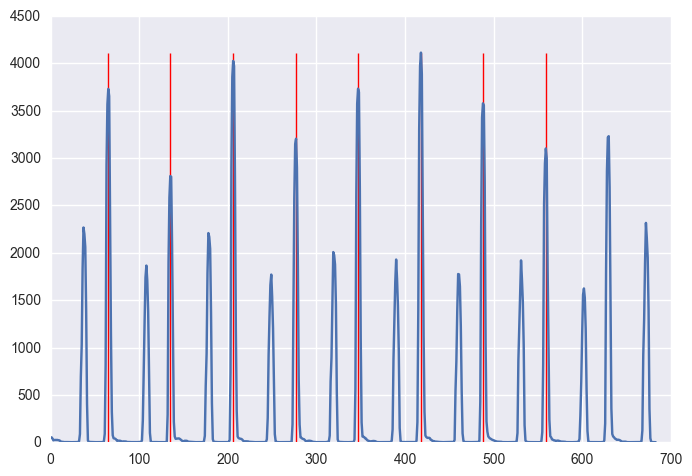

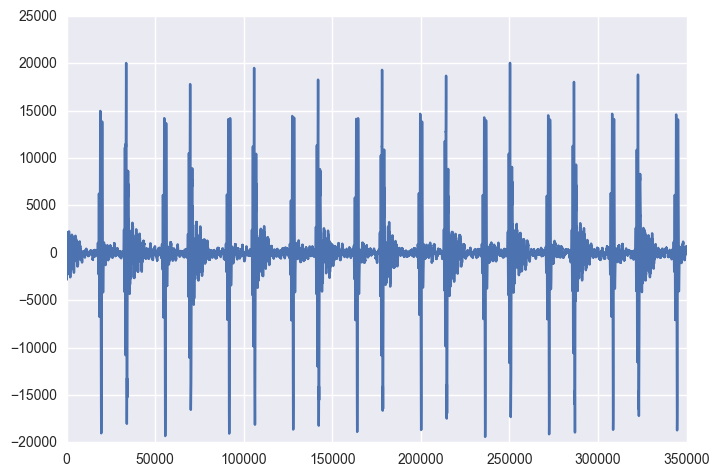

murmur


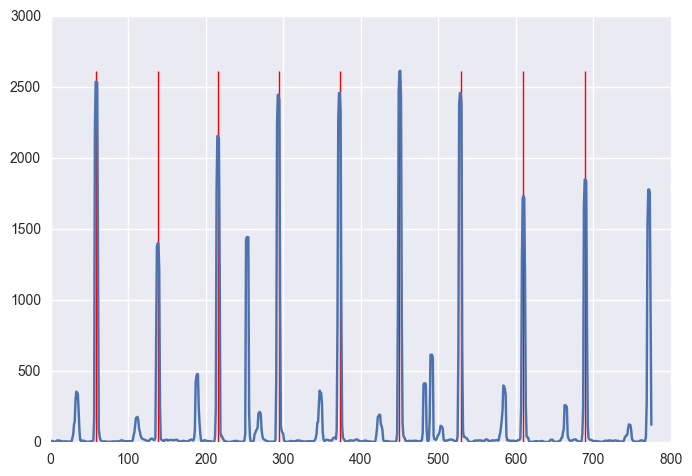

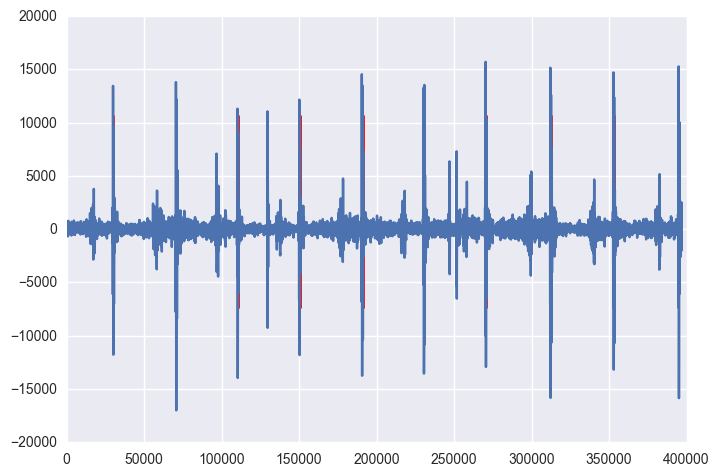

artifact


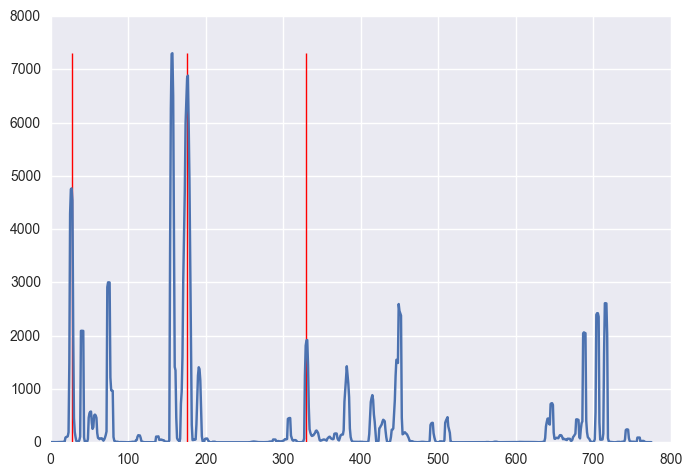

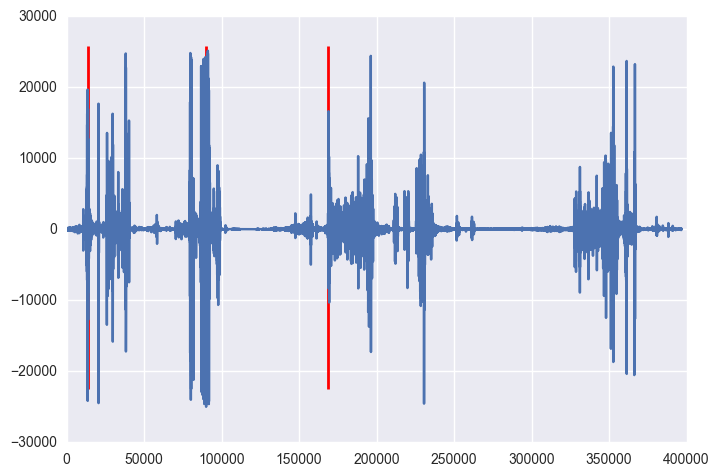

normal


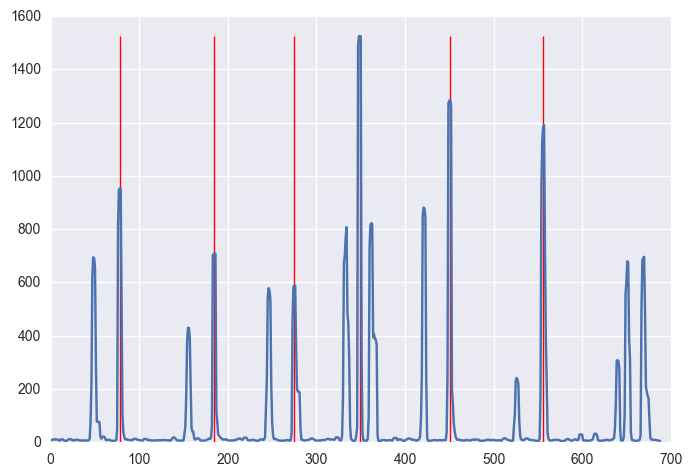

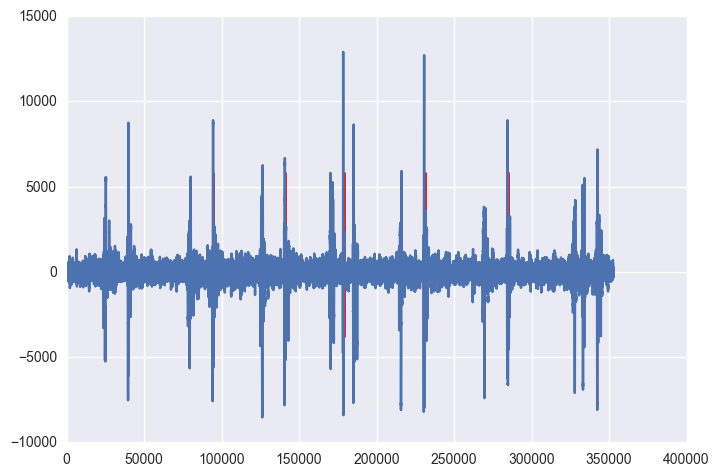

artifact


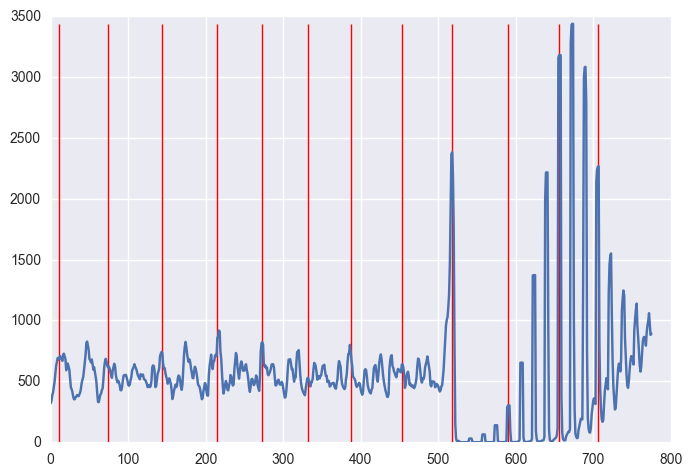

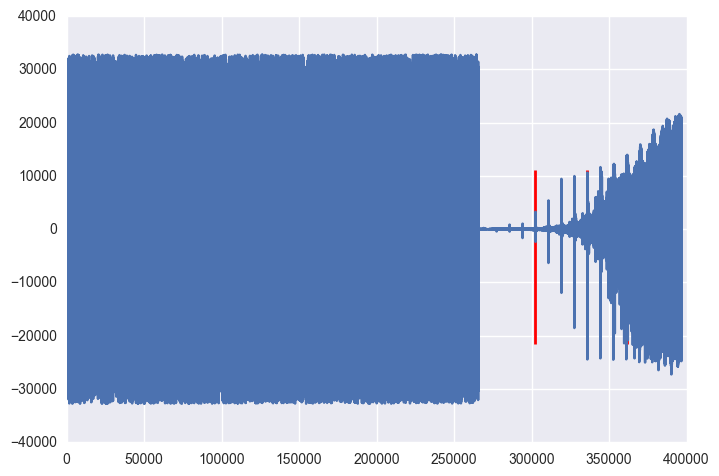

extrahls


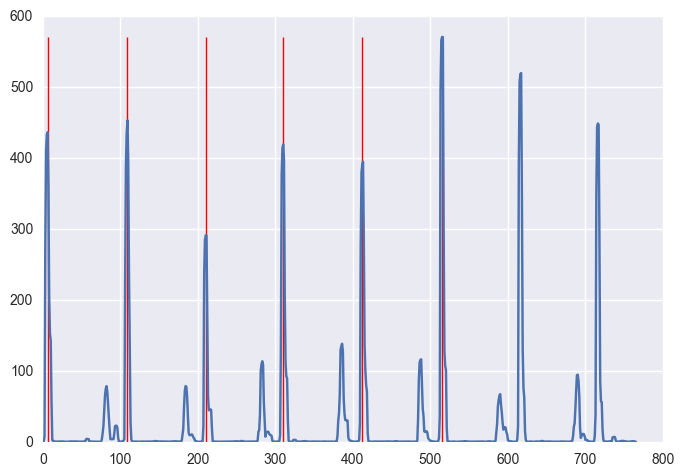

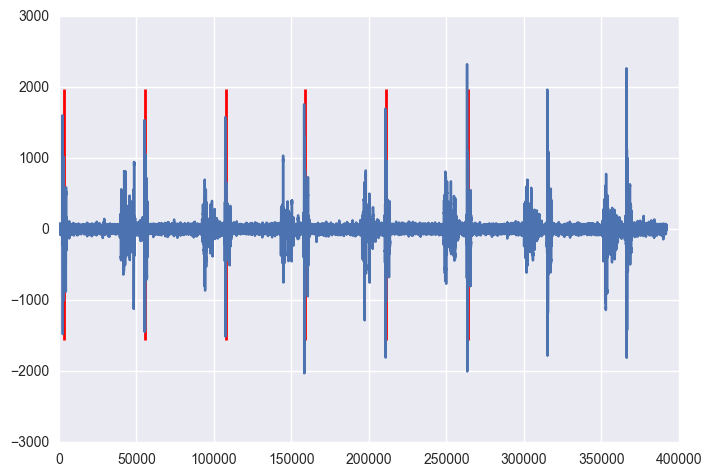

murmur


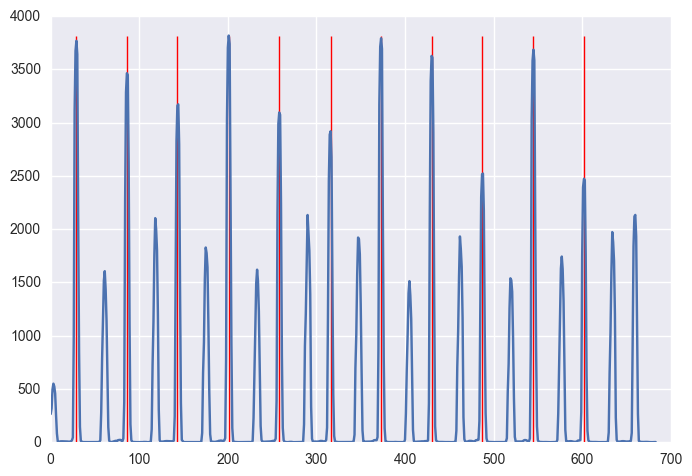

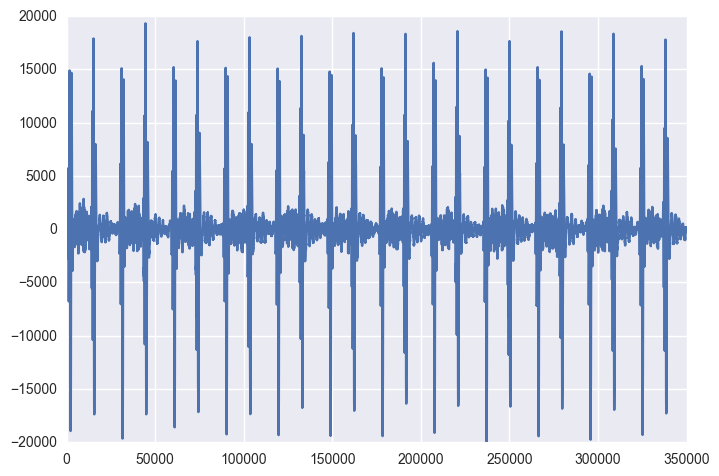

murmur


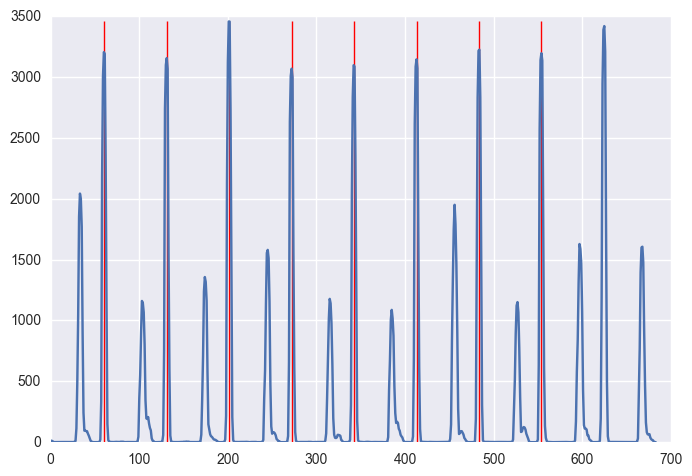

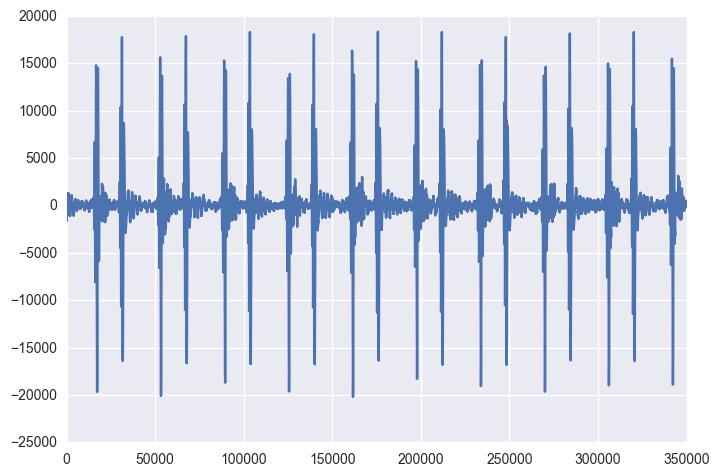

artifact


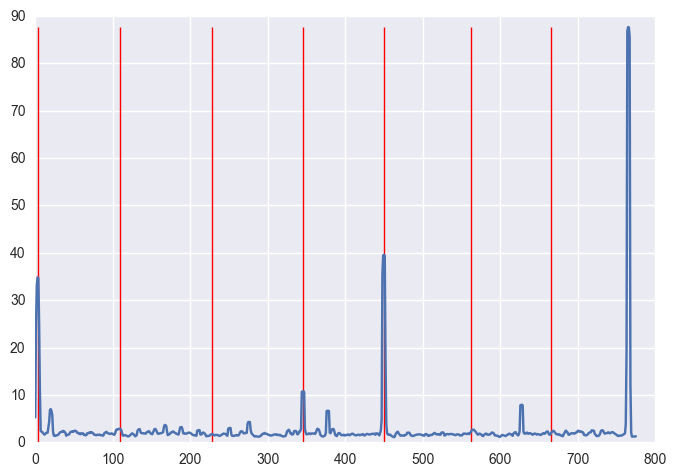

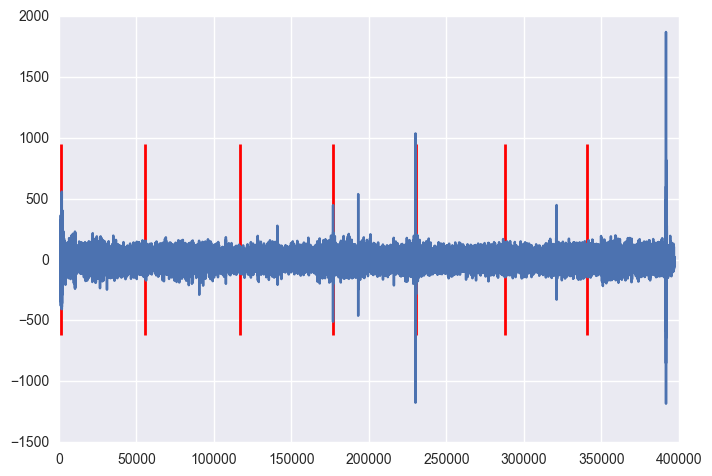

normal


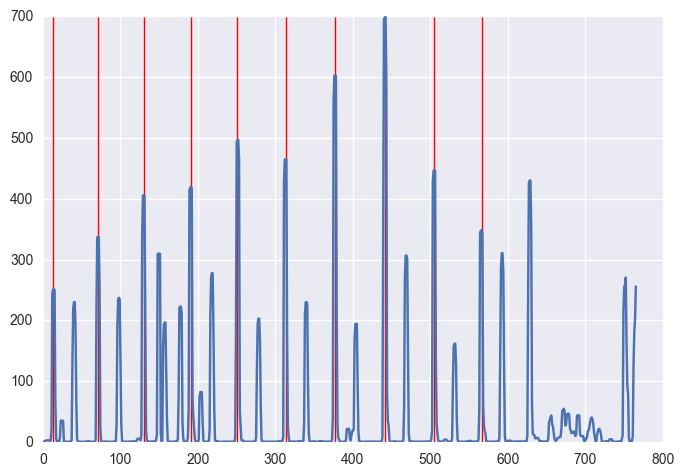

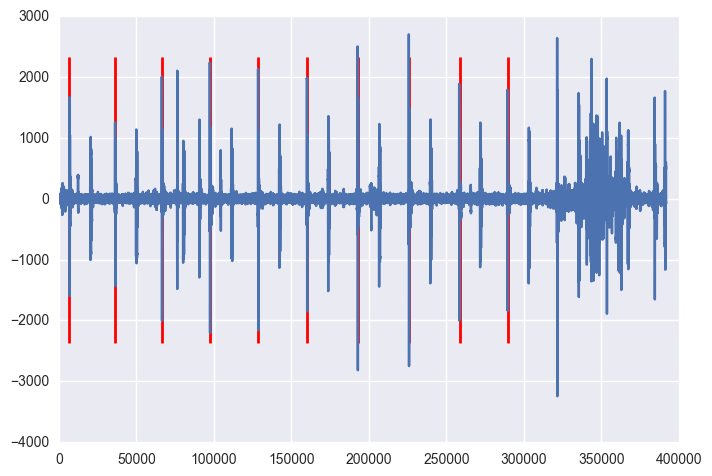

extrahls


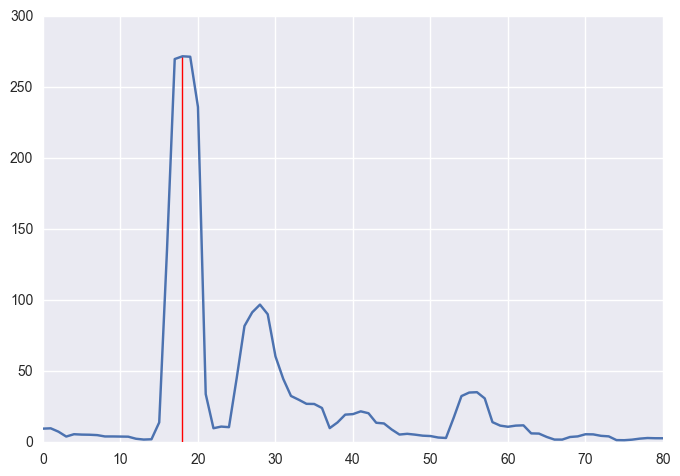

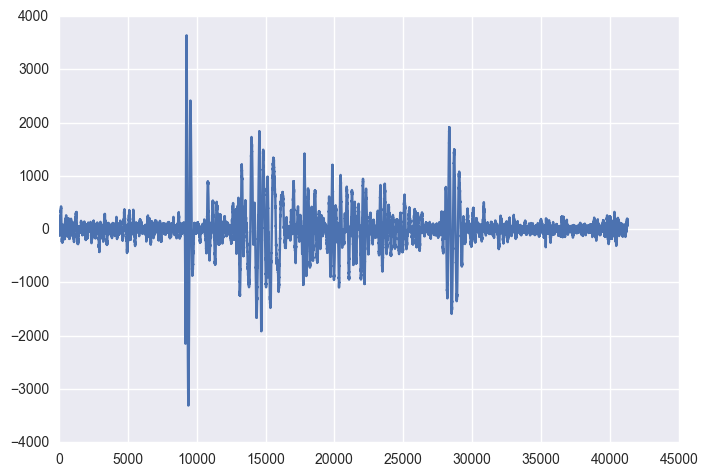

artifact


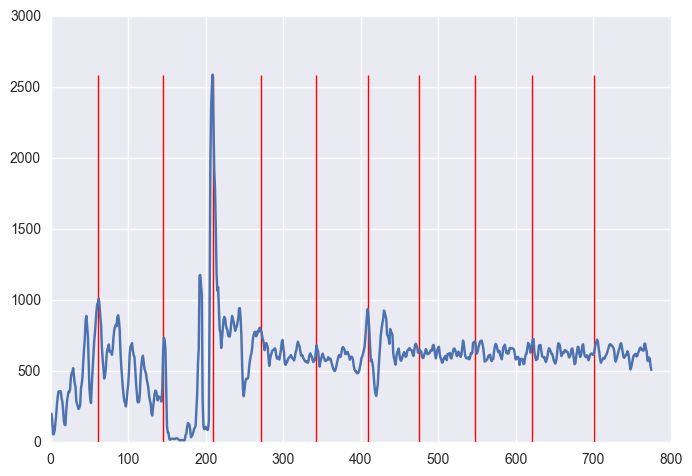

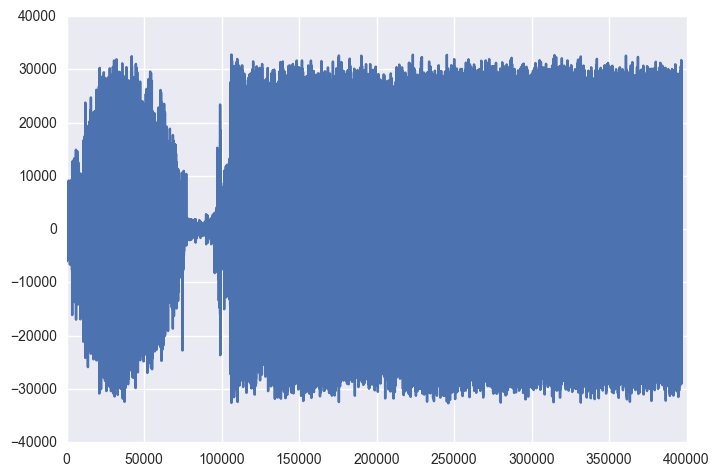

artifact


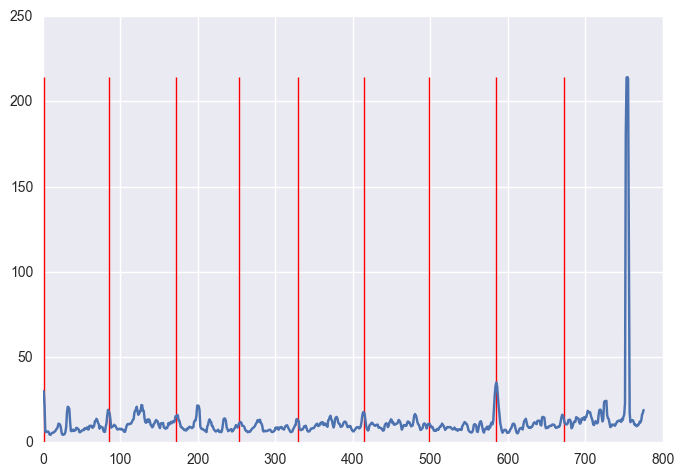

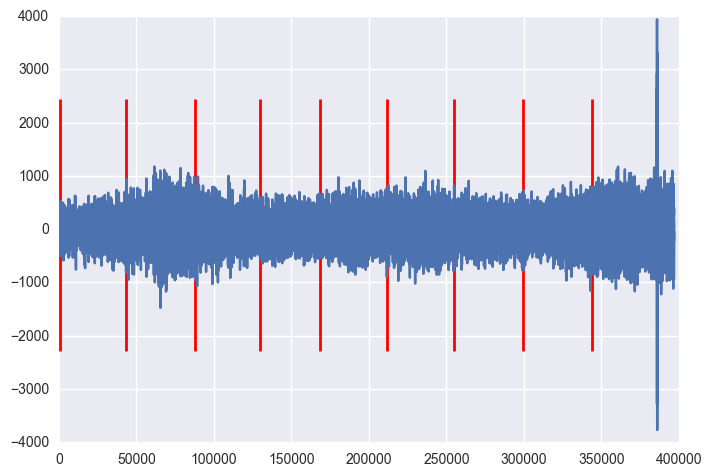

murmur


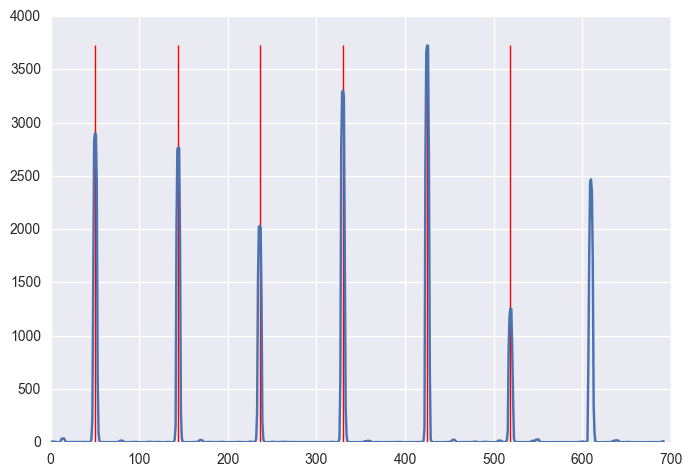

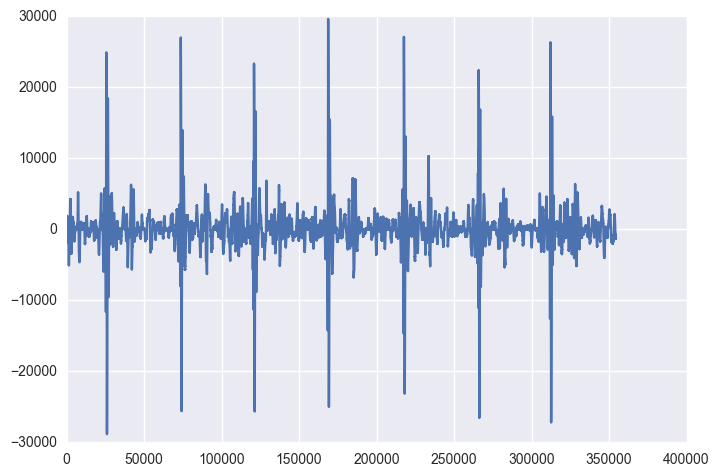

artifact


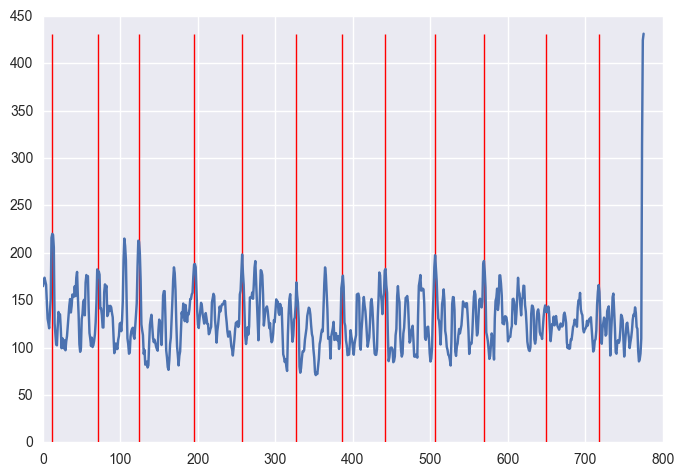

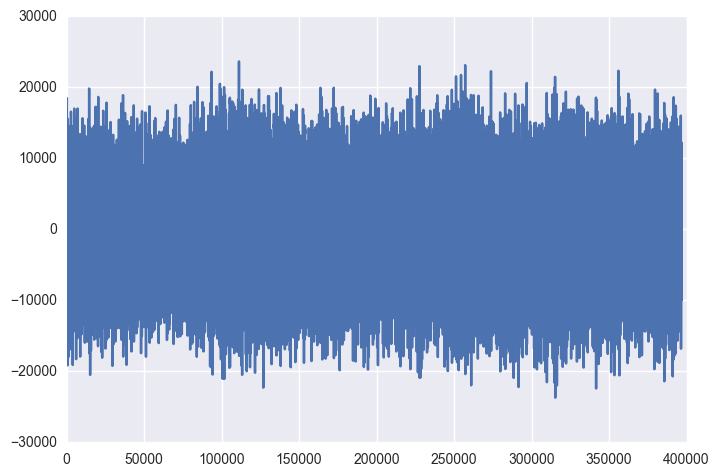

normal


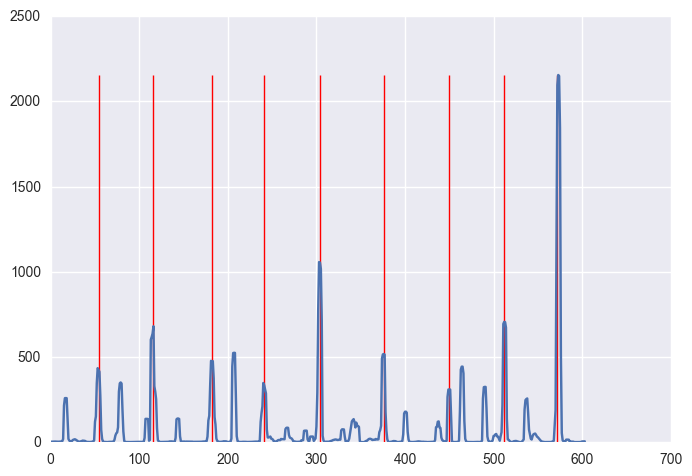

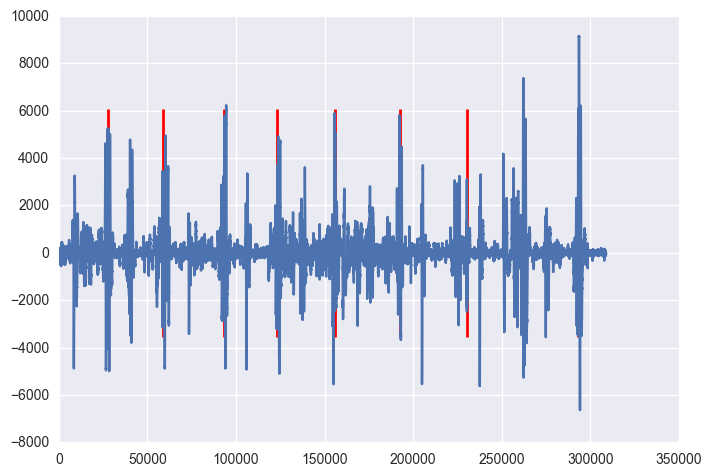

artifact


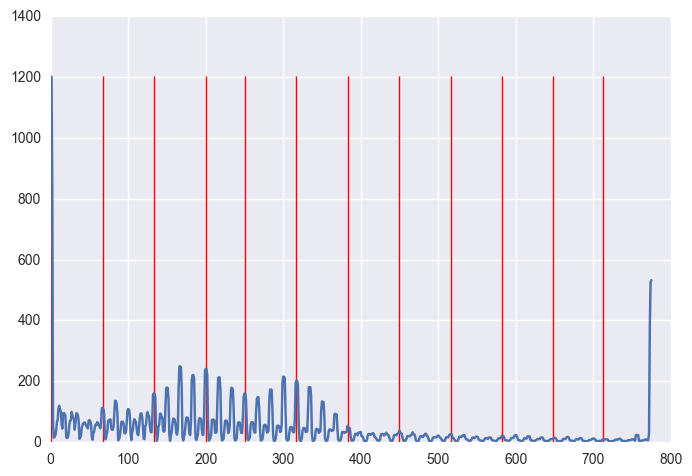

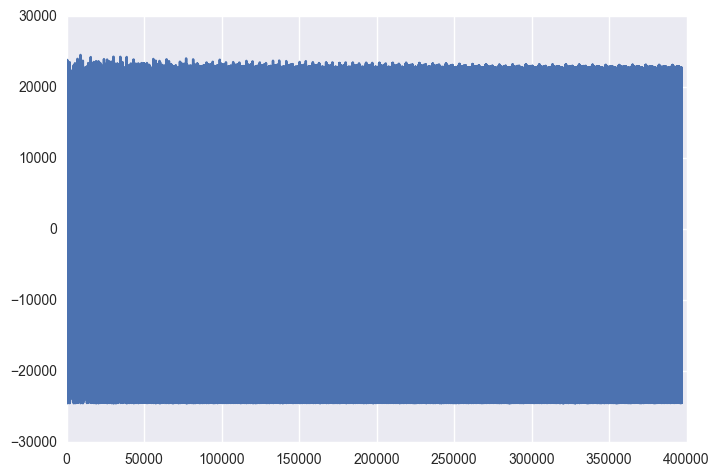

murmur


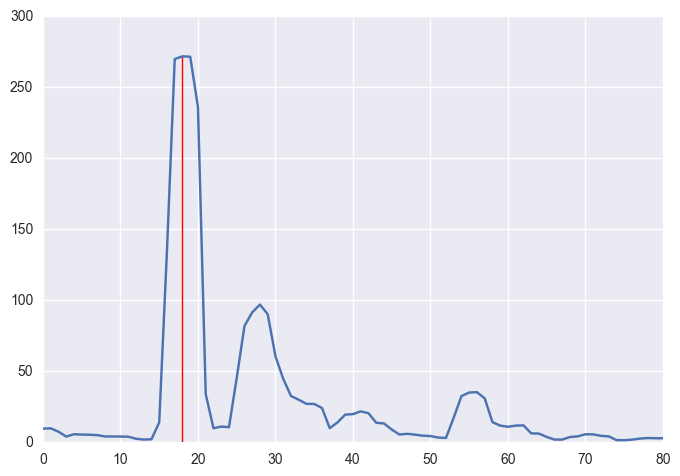

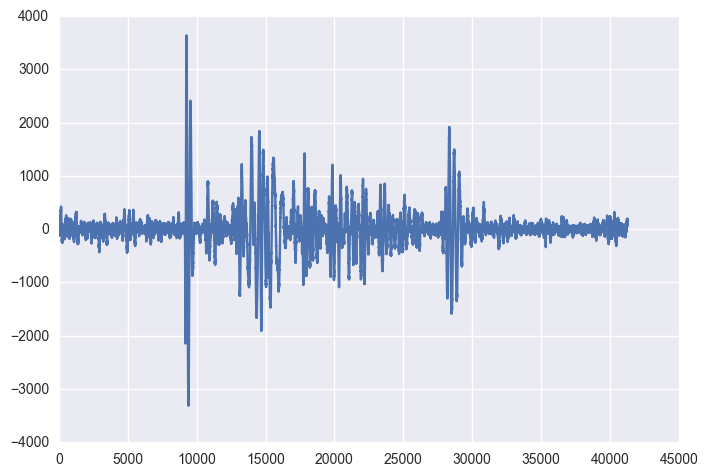

murmur


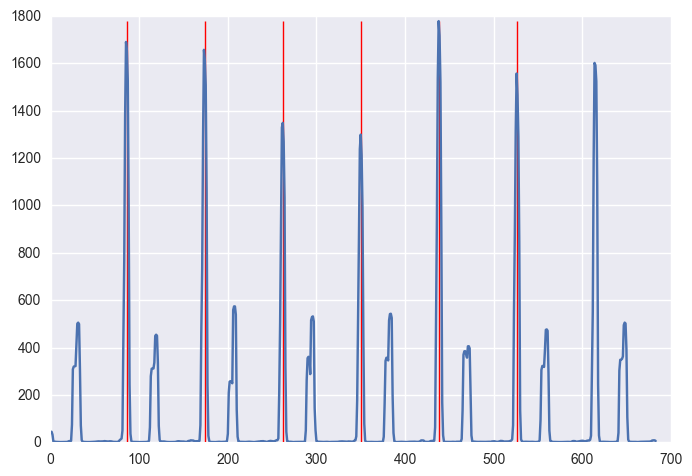

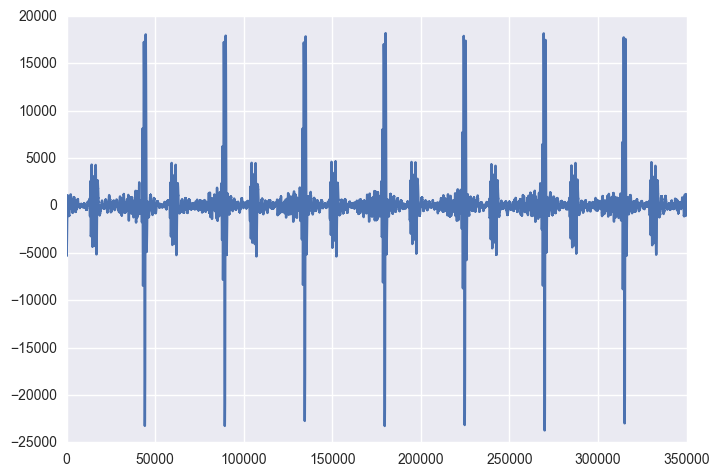

In [10]:
cols=['type',
      'avg_rmse','std_rmse','kur_rmse','skew_rmse',
      'avg_zcr','std_zcr','kur_zcr','skew_zcr',
      'avg_mfcc_0','std_mfcc_0','kur_mfcc_0','skew_mfcc_0',
      'avg_mfcc_1','std_mfcc_1','kur_mfcc_1','skew_mfcc_1',
      'avg_mfcc_2','std_mfcc_2','kur_mfcc_2','skew_mfcc_2',
      'avg_mfcc_3','std_mfcc_3','kur_mfcc_3','skew_mfcc_3',
      'avg_mfcc_4','std_mfcc_4','kur_mfcc_4','skew_mfcc_4',
      'avg_mfcc_5','std_mfcc_5','kur_mfcc_5','skew_mfcc_5',
      'avg_mfcc_6','std_mfcc_6','kur_mfcc_6','skew_mfcc_6',
      'avg_mfcc_7','std_mfcc_7','kur_mfcc_7','skew_mfcc_7',
      'avg_mfcc_8','std_mfcc_8','kur_mfcc_8','skew_mfcc_8',
      'avg_mfcc_9','std_mfcc_9','kur_mfcc_9','skew_mfcc_9',
      'avg_mfcc_10','std_mfcc_10','kur_mfcc_10','skew_mfcc_10',
      'avg_mfcc_11','std_mfcc_11','kur_mfcc_11','skew_mfcc_11',
      'avg_mfcc_12','std_mfcc_12','kur_mfcc_12','skew_mfcc_12',
      'avg_mfcc_13','std_mfcc_13','kur_mfcc_13','skew_mfcc_13',
      'avg_mfcc_14','std_mfcc_14','kur_mfcc_14','skew_mfcc_14',
      'avg_mfcc_15','std_mfcc_15','kur_mfcc_15','skew_mfcc_15',
      'avg_mfcc_16','std_mfcc_16','kur_mfcc_16','skew_mfcc_16',
      'avg_mfcc_17','std_mfcc_17','kur_mfcc_17','skew_mfcc_17',
      'avg_mfcc_18','std_mfcc_18','kur_mfcc_18','skew_mfcc_18',
      'avg_mfcc_19','std_mfcc_19','kur_mfcc_19','skew_mfcc_19',
      'avg_mfcc_20','std_mfcc_20','kur_mfcc_10','skew_mfcc_20',
      'avg_mfcc_21','std_mfcc_21','kur_mfcc_11','skew_mfcc_21',
      'avg_mfcc_22','std_mfcc_22','kur_mfcc_12','skew_mfcc_22',
      'avg_mfcc_23','std_mfcc_23','kur_mfcc_13','skew_mfcc_23',
      'avg_mfcc_24','std_mfcc_24','kur_mfcc_14','skew_mfcc_24',
      'avg_mfcc_25','std_mfcc_25','kur_mfcc_15','skew_mfcc_25',
      'avg_mfcc_26','std_mfcc_26','kur_mfcc_16','skew_mfcc_26',
      'avg_mfcc_27','std_mfcc_27','kur_mfcc_17','skew_mfcc_27',
      'avg_mfcc_28','std_mfcc_28','kur_mfcc_18','skew_mfcc_28',
      'avg_mfcc_29','std_mfcc_29','kur_mfcc_19','skew_mfcc_29'
     ]
augmentted_summary_df = pd.DataFrame(columns=cols)
for fname in training_set[0:50]:
    
    category = fname.split('__')[0]
    
    sound_clip = pd.read_csv(data_dir+'/'+fname, dtype = 'float')
    sound_clip[sound_clip[col_name]<20.0*np.std(sound_clip[col_name])][col_name] = 0
    col_name = sound_clip.columns.values[0]
    sr_clip = int(col_name)
    y_percussive = lb.effects.percussive(sound_clip[col_name].values, margin=5.0)
    o_env = lb.feature.rmse(y_percussive,frame_length=2048, hop_length=512)[0]
    
    print(category)
    #beats=lb.onset.onset_detect(sound_clip[col_name].values, sr=sr_clip, onset_envelope=o_env,backtrack=True,
    #                        hop_length=512, units='samples', wait =50)
    #beats=lb.beat.beat_track(y_percussive, sr=sr_clip, onset_envelope=o_env, hop_length=256, start_bpm=120.0, tightness=50, trim=True, bpm=None, units='samples')
   
    #beats=lb.onset.onset_detect(sound_clip[col_name].values, sr=sr_clip, onset_envelope=o_env,backtrack=True,
    #                        hop_length=512, units='frames', wait =50)
    beats=lb.beat.beat_track(y_percussive, sr=sr_clip, onset_envelope=o_env, hop_length=256, start_bpm=120.0, tightness=50, trim=True, bpm=None, units='frames')
    plt.plot(o_env)
    plt.vlines(beats[1],0,max(o_env),linewidth=1.0, color='r', label='Beats')
    plt.show()
    
    plt.plot(sound_clip)  
    plt.vlines(beats[1]*512,min(y_percussive),max(y_percussive),linewidth=2.0, color='r', label='Beats')
    plt.show()
    
    np.random.seed(42)
    
    for i in range(0,len(beats[1])-1):
        
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats
        
        
        augmentted_summary_stats=[category]
        small_clip_percussive = lb.effects.percussive(small_clip)
        small_clip_harmonic = lb.effects.harmonic(small_clip)
        
        
        amp=np.random.uniform(0.25,0.75)
        
        small_clip = amp*small_clip_percussive + (1.0-amp)*small_clip_harmonic
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats
        
        
        
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        noise = np.random.normal(loc=0.0, scale=0.25*np.std(small_clip), size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats
        
        
        
        
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        rscale = np.random.uniform(0.5*np.std(small_clip),1.5*np.std(small_clip))
        noise = np.random.normal(loc=0.0, scale=rscale, size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats

    
    
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        stretch = np.random.uniform(0.6,1.4)
        
        small_clip = lb.effects.time_stretch(small_clip, stretch)
        
        rscale = np.random.uniform(0.5*np.std(small_clip),1.5*np.std(small_clip))
        noise = np.random.normal(loc=0.0, scale=rscale, size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats
        
        
        
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        noise = np.random.normal(loc=0.0, scale=0.25*np.std(small_clip), size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats
        
        
        
        
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        rscale = np.random.uniform(0.25*np.std(small_clip),1.75*np.std(small_clip))
        noise = np.random.normal(loc=0.0, scale=rscale, size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats

    
    
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        stretch = np.random.uniform(0.3,1.7)
        
        small_clip = lb.effects.time_stretch(small_clip, stretch)
        
        rscale = np.random.uniform(0.5*np.std(small_clip),1.5*np.std(small_clip))
        noise = np.random.normal(loc=0.0, scale=rscale, size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats
        
        
        
        augmentted_summary_stats=[category]

        small_clip = sound_clip[col_name].values[beats[1][i]*512:beats[1][i+1]*512]
        
        steps = np.random.uniform(-4,4)
        
        if steps == 0: 
            steps = np.random.uniform(-4,4)
        
        small_clip = lb.effects.pitch_shift(small_clip, sr = sr_clip, n_steps = steps)
        
        rscale = np.random.uniform(0.5*np.std(small_clip),1.5*np.std(small_clip))
        noise = np.random.normal(loc=0.0, scale=rscale, size=len(small_clip))
        
        small_clip = small_clip + noise
        
        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        energy_norm = np.mean(rmse_array)

        small_clip = small_clip/energy_norm

        rmse_array = lb.feature.rmse(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(rmse_array))
        augmentted_summary_stats.append(np.std(rmse_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(rmse_array))
        augmentted_summary_stats.append(sp.stats.skew(rmse_array))

        zcr_array = lb.feature.zero_crossing_rate(small_clip,
                                     frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]

        augmentted_summary_stats.append(np.mean(zcr_array))
        augmentted_summary_stats.append(np.std(zcr_array))
        augmentted_summary_stats.append(sp.stats.kurtosis(zcr_array))
        augmentted_summary_stats.append(sp.stats.skew(zcr_array))

        mfcc_array = lb.feature.mfcc(small_clip, sr=sr_clip,n_mfcc=30)

        for j in range(0,30):

            mfcc_data = mfcc_array[j]

            augmentted_summary_stats.append(np.mean(mfcc_data))
            augmentted_summary_stats.append(np.std(mfcc_data))
            augmentted_summary_stats.append(sp.stats.kurtosis(mfcc_data))
            augmentted_summary_stats.append(sp.stats.skew(mfcc_data))

        augmentted_summary_df.loc[len(augmentted_summary_df)] = augmentted_summary_stats

In [11]:
augmentted_summary_df

type  avg_rmse  std_rmse   kur_rmse  skew_rmse   avg_zcr   std_zcr  \
0     artifact       1.0  0.737468   4.502929   1.886711  0.003266  0.009029   
1     artifact       1.0  0.706889   3.195279   1.641331  0.003315  0.008842   
2     artifact       1.0  0.663876   4.997253   2.014696  0.139628  0.119327   
3     artifact       1.0  0.294441   9.458466   2.829335  0.376972  0.111724   
4     artifact       1.0  0.240934   9.761839   2.860355  0.395038  0.098411   
5     artifact       1.0  0.661813   5.188655   2.049685  0.138519  0.114933   
6     artifact       1.0  0.210918  10.920658   3.009090  0.413382  0.092437   
7     artifact       1.0  0.295479  25.703544   4.440323  0.400319  0.095402   
8     artifact       1.0  0.528548  16.209298   3.404366  0.273545  0.127389   
9     artifact       1.0  0.884707   4.918357   2.072073  0.004736  0.011269   
10    artifact       1.0  0.860239   3.980409   1.911726  0.004736  0.011247   
11    artifact       1.0  0.781309   5.602527   2.235675  0.170773  0.135060   
12    artifact       1.0  0.482913   7.897572   2.666994  0.327376  0.137170   
13    artifact       1.0  0.315135  15.890221   3.463909  0.405509  0.105269   
14    artifact       1.0  0.777639   5.502597   2.219125  0.168342  0.133005   
15    artifact       1.0  0.224129  10.042901   2.989134  0.429119  0.097604   
16    artifact       1.0  0.383441  13.670557   3.382056  0.374004  0.113273   
17    artifact       1.0  0.309386  23.540010   4.127607  0.411118  0.104589   
18    artifact       1.0  0.764871  12.820255   2.809429  0.003931  0.009148   
19    artifact       1.0  1.126353  43.982153   5.888357  0.004966  0.010343   
20    artifact       1.0  0.688864  14.410718   3.042356  0.135352  0.123840   
21    artifact       1.0  0.288021  27.747736   4.506744  0.392524  0.101597   
22    artifact       1.0  0.419853   7.080781   2.430180  0.346498  0.131817   
23    artifact       1.0  0.687413  14.440012   3.049437  0.135253  0.122781   
24    artifact       1.0  0.251025  30.485904   4.761584  0.409617  0.093002   
25    artifact       1.0  0.409992  10.918668   2.776278  0.338416  0.124735   
26    artifact       1.0  0.319419   8.250916   2.583123  0.356206  0.112628   
27    artifact       1.0  0.691526   8.326484   2.358714  0.003003  0.004795   
28    artifact       1.0  0.617145   4.608409   1.705174  0.002128  0.002624   
29    artifact       1.0  0.626527   9.300008   2.537299  0.125416  0.105236   
...        ...       ...       ...        ...        ...       ...       ...   
2814    murmur       1.0  0.518804  25.596658   5.000212  0.452818  0.098230   
2815    murmur       1.0  0.718412  29.706633   5.365207  0.448236  0.099150   
2816    murmur       1.0  0.494600  45.915131   6.440989  0.460439  0.095237   
2817    murmur       1.0  1.985883  19.620806   4.279778  0.004817  0.006857   
2818    murmur       1.0  2.247668  21.864740   4.524461  0.005569  0.007944   
2819    murmur       1.0  1.493278  21.036905   4.464611  0.325297  0.149906   
2820    murmur       1.0  0.631183  25.245586   4.944288  0.438621  0.109079   
2821    murmur       1.0  0.702290  34.908257   5.631977  0.444924  0.106742   
2822    murmur       1.0  1.497464  21.242112   4.487463  0.324755  0.150486   
2823    murmur       1.0  1.070360  22.799302   4.669871  0.394696  0.134807   
2824    murmur       1.0  0.726173  45.050759   6.173091  0.432921  0.119041   
2825    murmur       1.0  0.567684  40.985906   6.228658  0.461888  0.089821   
2826    murmur       1.0  2.027322  20.582418   4.374087  0.003490  0.006423   
2827    murmur       1.0  2.434758  23.829566   4.714412  0.005614  0.009293   
2828    murmur       1.0  1.518188  22.165767   4.569165  0.332985  0.150877   
2829    murmur       1.0  0.494983  28.282951   5.205019  0.459925  0.096157   
2830    murmur       1.0  0.926175  35.936321   5.628609  0.430451  0.119620   
2831    murmur       1.0  1.521492  22.134301   4.567979  0.332830  0.151037   
2832    mu

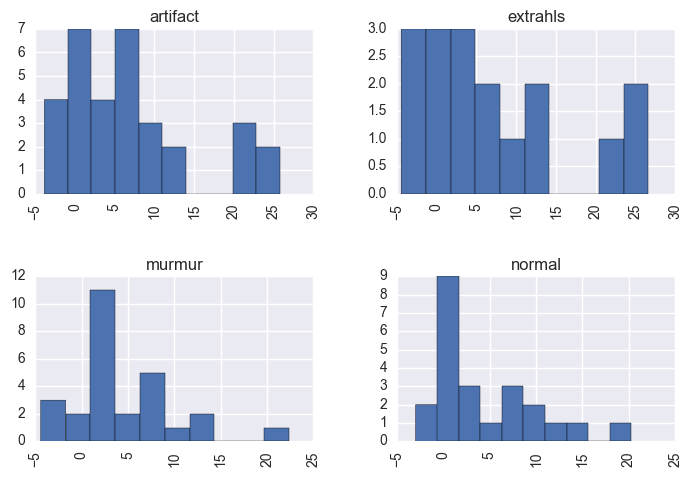

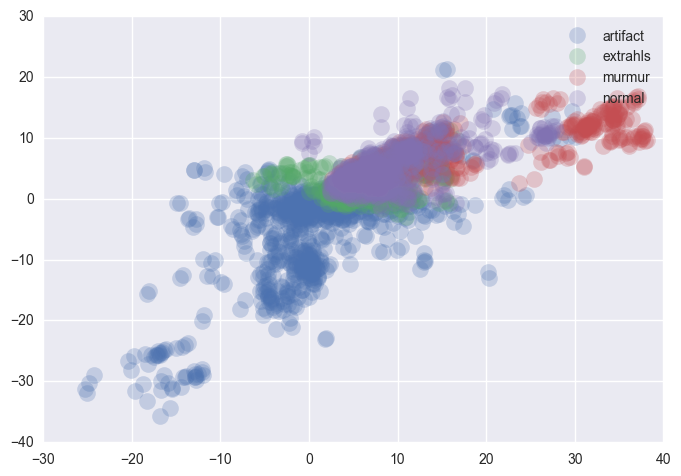

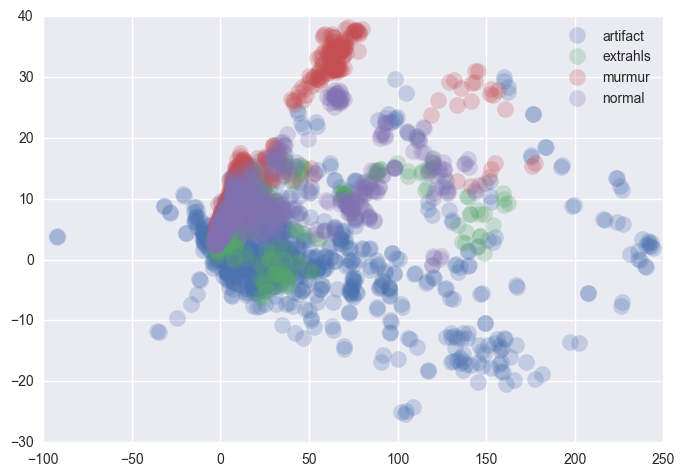

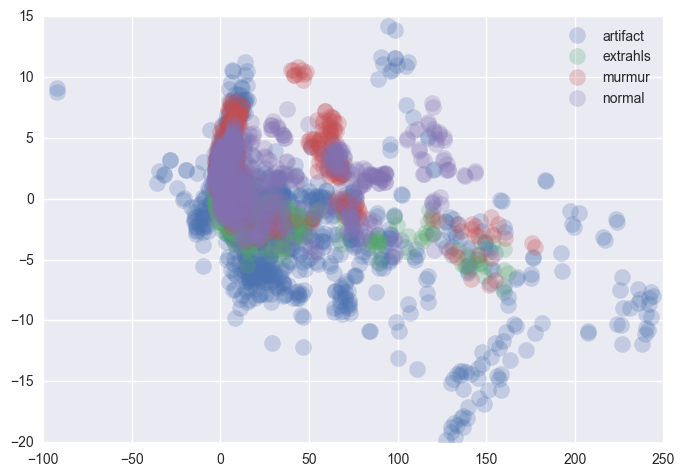

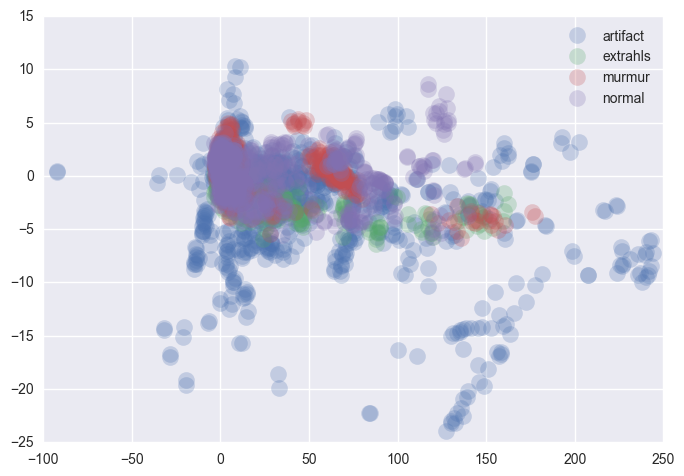

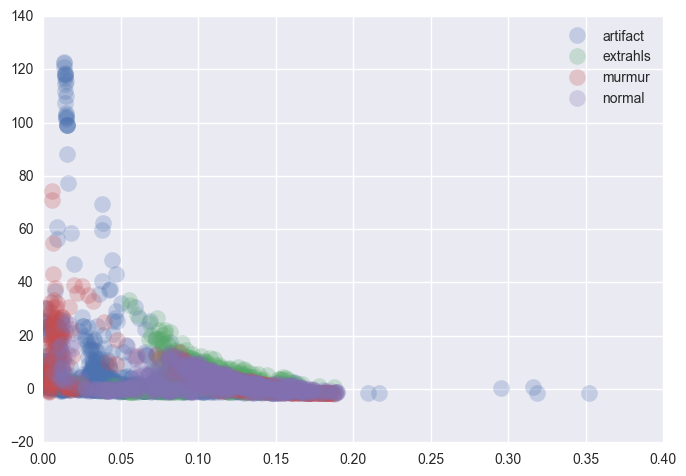

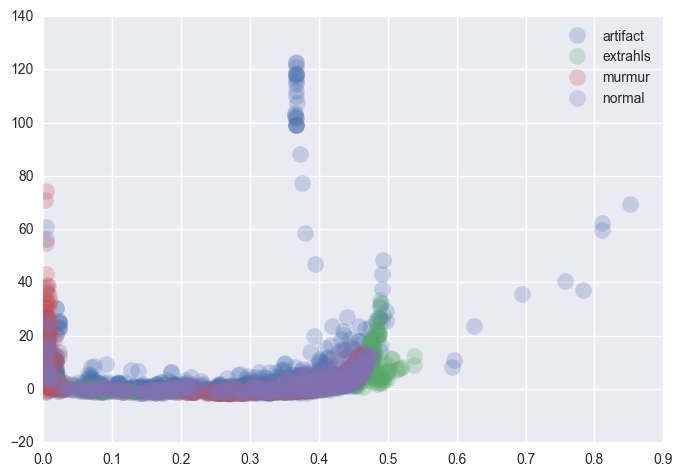

In [12]:
augmentted_summary_df['avg_mfcc_7'].hist(by=summary_df['type'])
plt.show()

groups = augmentted_summary_df.groupby('type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['avg_mfcc_5'], group['avg_mfcc_10'], marker='o', linestyle='', ms=12, label=name,alpha=0.25)
ax.legend()
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['avg_mfcc_1'], group['avg_mfcc_5'], marker='o', linestyle='', ms=12, label=name,alpha=0.25)
ax.legend()
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['avg_mfcc_1'], group['avg_mfcc_15'], marker='o', linestyle='', ms=12, label=name,alpha=0.25)
ax.legend()
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['avg_mfcc_1'], group['avg_mfcc_25'], marker='o', linestyle='', ms=12, label=name,alpha=0.25)
ax.legend()
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['std_zcr'], group['kur_zcr'], marker='o', linestyle='', ms=12, label=name,alpha=0.25)
ax.legend()
plt.show()

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['avg_zcr'], group['kur_zcr'], marker='o', linestyle='', ms=12, label=name,alpha=0.25)
ax.legend()
plt.show()



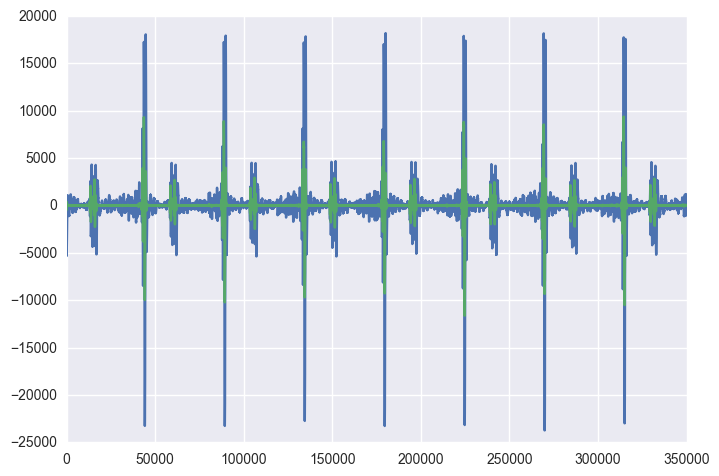

In [13]:
y_percussive = lb.effects.percussive(sound_clip[col_name].values, margin=2.0)
plt.plot(sound_clip[col_name].values)
plt.plot(y_percussive)
plt.show()

Segmentation appears to be a reasonable prospect. However, it certainly isn't perfect. Another possibility to augment the dataset size is to add noise and other effects to the signal. Since I don't get the 8x increase it is only about 3x increase in dataset size, I will combine both approaches. Doing this, there is already some reasonably nice clustering of the data, so it may be enough. 

In [14]:
augmentted_summary_df.to_csv('/Users/William/Desktop/heart-sounds/preprocessed_data/training.csv',index=False)

In [15]:
cols=['type',
      'avg_rmse','std_rmse','kur_rmse','skew_rmse',
      'avg_zcr','std_zcr','kur_zcr','skew_zcr',
      'avg_mfcc_0','std_mfcc_0','kur_mfcc_0','skew_mfcc_0',
      'avg_mfcc_1','std_mfcc_1','kur_mfcc_1','skew_mfcc_1',
      'avg_mfcc_2','std_mfcc_2','kur_mfcc_2','skew_mfcc_2',
      'avg_mfcc_3','std_mfcc_3','kur_mfcc_3','skew_mfcc_3',
      'avg_mfcc_4','std_mfcc_4','kur_mfcc_4','skew_mfcc_4',
      'avg_mfcc_5','std_mfcc_5','kur_mfcc_5','skew_mfcc_5',
      'avg_mfcc_6','std_mfcc_6','kur_mfcc_6','skew_mfcc_6',
      'avg_mfcc_7','std_mfcc_7','kur_mfcc_7','skew_mfcc_7',
      'avg_mfcc_8','std_mfcc_8','kur_mfcc_8','skew_mfcc_8',
      'avg_mfcc_9','std_mfcc_9','kur_mfcc_9','skew_mfcc_9',
      'avg_mfcc_10','std_mfcc_10','kur_mfcc_10','skew_mfcc_10',
      'avg_mfcc_11','std_mfcc_11','kur_mfcc_11','skew_mfcc_11',
      'avg_mfcc_12','std_mfcc_12','kur_mfcc_12','skew_mfcc_12',
      'avg_mfcc_13','std_mfcc_13','kur_mfcc_13','skew_mfcc_13',
      'avg_mfcc_14','std_mfcc_14','kur_mfcc_14','skew_mfcc_14',
      'avg_mfcc_15','std_mfcc_15','kur_mfcc_15','skew_mfcc_15',
      'avg_mfcc_16','std_mfcc_16','kur_mfcc_16','skew_mfcc_16',
      'avg_mfcc_17','std_mfcc_17','kur_mfcc_17','skew_mfcc_17',
      'avg_mfcc_18','std_mfcc_18','kur_mfcc_18','skew_mfcc_18',
      'avg_mfcc_19','std_mfcc_19','kur_mfcc_19','skew_mfcc_19',
      'avg_mfcc_20','std_mfcc_20','kur_mfcc_10','skew_mfcc_20',
      'avg_mfcc_21','std_mfcc_21','kur_mfcc_11','skew_mfcc_21',
      'avg_mfcc_22','std_mfcc_22','kur_mfcc_12','skew_mfcc_22',
      'avg_mfcc_23','std_mfcc_23','kur_mfcc_13','skew_mfcc_23',
      'avg_mfcc_24','std_mfcc_24','kur_mfcc_14','skew_mfcc_24',
      'avg_mfcc_25','std_mfcc_25','kur_mfcc_15','skew_mfcc_25',
      'avg_mfcc_26','std_mfcc_26','kur_mfcc_16','skew_mfcc_26',
      'avg_mfcc_27','std_mfcc_27','kur_mfcc_17','skew_mfcc_27',
      'avg_mfcc_28','std_mfcc_28','kur_mfcc_18','skew_mfcc_28',
      'avg_mfcc_29','std_mfcc_29','kur_mfcc_19','skew_mfcc_29'
     ]
summary_df = pd.DataFrame(columns=cols)
rowind = 0
for fname in test_set:
    
    category = fname.split('__')[0]
    
    summary_stats=[category]
    
    sound_clip = pd.read_csv(data_dir+'/'+fname, dtype = 'float')
    col_name = sound_clip.columns.values[0]
    sr_clip = int(col_name)
    
    rmse_array = lb.feature.rmse(sound_clip[col_name].values,
                                 frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]
    
    energy_norm = np.mean(rmse_array)
    
    sound_clip[col_name] = sound_clip[col_name]/energy_norm
    
    rmse_array = lb.feature.rmse(sound_clip[col_name].values,
                                 frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]
    
    summary_stats.append(np.mean(rmse_array))
    summary_stats.append(np.std(rmse_array))
    summary_stats.append(sp.stats.kurtosis(rmse_array))
    summary_stats.append(sp.stats.skew(rmse_array))
    
    zcr_array = lb.feature.zero_crossing_rate(sound_clip[col_name].values,
                                 frame_length=int(0.01*sr_clip), hop_length=int(0.01/4.0*sr_clip))[0]
    
    summary_stats.append(np.mean(zcr_array))
    summary_stats.append(np.std(zcr_array))
    summary_stats.append(sp.stats.kurtosis(zcr_array))
    summary_stats.append(sp.stats.skew(zcr_array))
    
    mfcc_array = lb.feature.mfcc(sound_clip[col_name].values, sr=sr_clip,n_mfcc=30)
    
    for i in range(0,30):
        
        mfcc_data = mfcc_array[i]
        
        summary_stats.append(np.mean(mfcc_data))
        summary_stats.append(np.std(mfcc_data))
        summary_stats.append(sp.stats.kurtosis(mfcc_data))
        summary_stats.append(sp.stats.skew(mfcc_data))
    
    summary_df.loc[len(summary_df)] = summary_stats

In [16]:
summary_df.head()

type  avg_rmse  std_rmse   kur_rmse  skew_rmse   avg_zcr   std_zcr  \
0  artifact       1.0  1.724394  24.501217   4.383871  0.490352  0.282725   
1  artifact       1.0  1.261478  10.917632   2.943599  0.300845  0.081947   
2  artifact       1.0  2.333001  30.824645   5.148119  0.175970  0.168700   
3  artifact       1.0  0.543040  -0.963379  -0.974930  0.087634  0.023781   
4  artifact       1.0  0.562426   0.508714   0.614909  0.065291  0.018074   

    kur_zcr  skew_zcr  avg_mfcc_0      ...       kur_mfcc_17  skew_mfcc_27  \
0 -1.823356  0.005663   11.542647      ...          1.954461     -0.556818   
1 -0.744243 -0.442764  133.771132      ...          0.159491     -0.045019   
2  1.027231  1.119641  -31.309272      ...          0.109165     -0.254393   
3 -0.344560 -0.642707  110.877082      ...          0.495829     -0.124162   
4  1.298541  0.731989   63.173026      ...          0.300116      0.320938   

   avg_mfcc_28  std_mfcc_28  kur_mfcc_18  skew_mfcc_28  avg_mfcc_29  \
0    -0.379904     2.715487     1.294489      0.760910    -0.052876   
1    -0.065938     3.616001     0.059676      0.103685     0.279524   
2    -1.266795     3.524303     0.151230     -0.106818    -1.815366   
3    -0.372093     4.253866     0.747289     -0.016734    -0.999383   
4    -2.250205     4.246446     1.226162      0.640619    -3.352904   

   std_mfcc_29  kur_mfcc_19  skew_mfcc_29  
0     2.922357     1.755120     -1.215311  
1     3.734367     0.374533     -0.023830  
2     3.430343     0.182577     -0.152027  
3     4.194286     0.232099     -0.206462  
4     3.763505     0.380959      0.154018  

[5 rows x 129 columns]

In [17]:
summary_df.to_csv('/Users/William/Desktop/heart-sounds/preprocessed_data/test.csv',index=False)